# Банк "Метанпром". Анализ оттока клиентов

*ссылка на презентацию*:  
https://disk.yandex.ru/i/YfFzqu6Z5Xfe0g

Представлены данные о клиентах банка. Для каждого клиента известен набор признаков, в частности, входит данный клиент в отток, или нет. Необходимо провести анализ датасета, чтобы выявить сегменты клиентов, которые в большей или меньшей степени подвержены оттоку, и на основании результатов дать рекомендации к взаимодействию с группами, где показатели оттока лучше всего.

Ранее проводился аналогичный анализ, однако к настоящему моменту его результаты устарели, поскольку изменился состав и значения признаков, которые влияют на отток. Поэтому будут даны актуальные результаты на основании свежих данных, которые лучше отразят текущие тенденции среди склонных к оттоку клиентов банка.

Данные для анализа я получу из файла bank_scrooge.csv.\
Каждая строка в таблице соответствует одному клиенту, а каждая колонка - одному из признаков. В ячейках указано значение признака для данного клиента.

USERID — идентификатор пользователя\
score — кредитный рейтинг\
city — город, где находится филиал банка\
gender — пол клиента\
age - возраст\
equity - количество баллов собственности\
balance - баланс клиента на момент выгрузки\
products - количество продуктов банка\
credit_card - признак наличия (1) или отсутствия (0) кредитной карты у клиента\
last_activity - была ли активность в последнее время (1), или её давно не было (0)\
EST_SALARY - оценочная зарплата клиента\
churn - признак оттока. (1) - клиент в оттоке, (0) - клиент не ушёл из банка.

В ходе исследования я проведу предобрабатку данных и их изучение, что включит в себя:
* Изменение форматов данных
* Анализ пропусков по их типу и работу с ними
* Поиск явных и неявных дубликатов и их устранение

После предобработки я перейду к исследованию всех признаков клиентов, а именно к действиям:
* Распределение и границы непрерывных значений
* Распределение клиентов по категориальным значениям
* Устранение аномалий, выявленных после анализа распределения
* Исследование данных в разрезе оттока 
* Получение уровня корреляции между конкретными признаками и оттоком
* Формирование сегментов с наилучшими показателями по оттоку относительно средних по банку

После проведения исследовательского анализа я сформирую гипотезы и проверю их статистическими методами, методы будут выбраны индивидуально в зависимости от типа признака, по которому формируется гипотеза.

Затем я подведу промежуточные итоги, выделив главные выводы из результатов исследовательского и статистического анализа, а именно - результаты анализа корреляций и проверки гипотез, выявляя важные закономерности.

Далее я перейду к формированию сегментов клиентов, где отток лучше, чем в среднем по банку, после чего проведу приоритизацию полученных сегментов - наивысший приоритет будет у сегментов, в которых показатели оттока лучше, чем во всех остальных.

В финале исследования я использую результаты анализа, проверки гипотез и сегментации для того, чтобы дать рекомендации по работе с определенными сегментами клиентов с наилучшими показателями, после чего подведу итоги.

Таким образом, моё исследование пройдёт в **17** этапов:


**Предобработка и изучение данных**
1. Изменение формата данных
2. Работа с пропусками
3. Устранение дубликатов 

**Исследовательский анализ**\
4. Анализ непрерывных значений\
5. Корреляция непрерывных значений с оттоком\
6. Анализ категориальных значений\
7. Корреляция категориальных значений с оттоком\
8. Анализ портрета клиента из оттока

**Статистический анализ и проверка гипотез**\
9. Определение генеральных совокупностей (выборка с клиентами в оттоке и выборка с действующими клиентами)\
10. Проверка гипотезы о равенстве среднего дохода клиентов в выборках\
11. Проверка гипотезы о равенстве среднего баланса в выборках\
12. Проверка гипотезы о равенстве среднего кредитного рейтинга в выборках при наличии кредитки\
13. Проверка гипотезы о равенстве среднего возраста клиентов в выборках

**Определение категорий и выводы исследования**\
14. Сегментация клиентов с наилучшими показателями по оттоку\
15. Приоритизация сегментов от наиболее приоритетного к менее приоритетному\
16. Формирование рекомендаций\
17. Заключение

### Предобработка данных

Загружаю необходимые библиотеки и данные.
Правлю названия колонок и смотрю на основную информацию о данных.

In [1]:
import pandas as pd
import random
!pip install phik
import phik
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import scipy.stats as st
import warnings
import plotly.express as px
import math as mth

In [2]:
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
except:
    df = pd.read_csv('/datasets/bank_scrooge.csv')
    
display(df.info(), df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Заметно, что, во - первых, в таблице есть пропущенные значения - немного пропусков в колонке age(возраст), и значительное количество пропуском в колонке balance(баланс клиента).\
Во вторых - возможно, не все типы данных соответствуют сути данных. На это также стоит обратить внимание.


Привожу названия колонок к нижнем регистру для удобства:

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

#### Работа с дубликатами

Ищу строки-дубликаты в данных. Цикл посчитает количество строк-дубликатов, после этого посчитает дубликаты в каждой колонке. Поскольку есть колонки с категориями, где дубли неизбежны, цикл выведет дубликаты только для тех колонок, где количество дубликатов не превышает 90% от всех записей в таблице.

In [4]:
print(f'Количество строк-дубликатов в таблице: {df.duplicated().sum()}')
print()
for column in df.columns:
    doubles = df[column].duplicated().sum()
    perc = doubles/df.shape[0]*100
    if perc < 90:
        print(f'Количество дубликатов в колонке {column}: {doubles}')
    else:
        pass

Количество строк-дубликатов в таблице: 0

Количество дубликатов в колонке userid: 73
Количество дубликатов в колонке balance: 2298
Количество дубликатов в колонке est_salary: 4


Также вывожу уникальные значения двух колонок, содержащих текст, чтобы исключить неявные дубликаты.

In [5]:
display(df['city'].unique())
display(df['gender'].unique())

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

array(['Ж', 'М'], dtype=object)

Обнаружены дубликаты:
* userid(идентификатор пользователя) - 73 дубля
* balance(баланс клиента) - 2298 дублей
* est_salary(доход клиента) - 4 дубля

Изучаю дубликаты в колонке userid. Их не должно встречаться в данных, поскольку каждая строка соответствует одному клиенту.

Вывожу дублирующиеся строки на экран, чтобы понять их природу.

In [6]:
dubls = df[df['userid'].duplicated(keep=False)].sort_values('userid')
dibl_users = dubls.copy()
display(dubls.head(10))
cities = df['city'].unique()
print(f'Города в датасете: {cities}')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Города в датасете: ['Рыбинск' 'Ярославль' 'Ростов']


Всего есть 73 дублирующихся идентификатора пользователя: из состава этих записей заметна некая закономерность, например, в паре дубликатов всегда есть Рыбинск и Ярославль, а также есть пропущенный баланс на одной из двух записей. И не видно Ростова.

Также проверяю, что каждый id указан в таблице только дважды:

In [7]:
dubls['userid'].value_counts().sort_values(ascending=False).unique()

array([2])

Верно, каждый id представлен дважды. С помощью кода проверяю, есть ли идентификаторы пользователей, где в двух записях указаны не Рыбинск или Ярославь, а один город указан дважды, либо указан Ростов в одной из записей:

In [8]:
def userid_test_cities(df, userid):
    """Функция для определения id клиентов, у которых иной состав городов в двух записях, нежели Ярославль или Рыбинск.
    
    Принимает на входе датафрейм и идентификатор пользователя. 
    Если города в дублирующихся записях соответствует правилу выше,
    то возвращает False, если не соответствуют - True"""
    userid_one = df[df['userid'] == userid]
    city_one = df[df['userid'] == userid]['city'].unique().tolist()
    if city_one !=  ['Рыбинск', 'Ярославль'] and city_one != ['Ярославль', 'Рыбинск']:
        print(f'ID: {userid}, города: {city_one}')
        return False
    else:
        return True
    

listd = []
for idd in dubls['userid'].unique():
    result = userid_test_cities(dubls, idd)
    if result == True:
        pass
    else:
        listd.append(idd)
        
if listd == []:
    print('Для каждого дублирующегося id клиента в одной записи указан Ярославль, а в другой - Рыбинск.')
else:
    print('Есть исключения.')

Для каждого дублирующегося id клиента в одной записи указан Ярославль, а в другой - Рыбинск.


Предположение подтвердилось - правило наличия двух городов в дубликатах Ярославь и Рыбинск применимо ко всем дублирующимся пользователям.\
Возможно, это связано с работой внутренних систем филиалов - идентификаторы дублировались, и совпадали в обоих филиалах.\
Появляется вопрос - принадлежат ли дубли одним и тем же клиентам?

In [9]:
dubls.head(15)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Пока все выглядит так, будто это другие клиенты: кредитный рейтинг у дубликатов разный, возраст - тоже, как баланс, заработок и остальные метрики, даже пол не всегда совпадает.\
Однако есть странности: в каждой паре дубликатов почти всегда одна из записей входит в отток, а другая - нет. Проверяю, справедливо ли это для всех дублей:

In [10]:
def userid_test_churns(df, userid):
    """Функция для определения id клиентов, у которых иной состав городов в двух записях, нежели Ярославль или Рыбинск.
    
    Принимает на входе датафрейм и идентификатор пользователя. 
    Если города в дублирующихся записях соответствует правилу выше,
    то возвращает False, если не соответствуют - True"""
    userid_one = df[df['userid'] == userid]
    churn_one = df[df['userid'] == userid]['churn'].unique()
    if churn_one.shape[0] != 2:
        return False
    else:
        return True
    
listd = []
for idd in dubls['userid'].unique():
    result = userid_test_churns(dubls, idd)
    if result == True:
        pass
    else:
        listd.append(idd)
        
count = 0
if listd == []:
    print('Для каждого дублирующегося id клиента в одной записи указан Ярославль, а в другой - Рыбинск.')
else:
    count = count + 1
    print('Есть исключения.')
    
count_perc = len(listd) / dubls['userid'].unique().shape[0] * 100
print(f'Исключения составляют {round(count_perc, 2)}% от всех дубликатов.')

Есть исключения.
Исключения составляют 31.51% от всех дубликатов.


Две трети дублирующихся записей имеют признак оттока в одной записи, а в другой - нет. Значительное количество, это нужно учесть в дальнейшем.\
Вторая странность - кажется, будто в каждой паре есть только одна запись о балансе, а вторая - пропущена.\
Проверяю и это:

In [11]:
def userid_test_balance(df, userid):
    """Функция для определения id клиентов, у которых иной состав городов в двух записях, нежели Ярославль или Рыбинск.
    
    Принимает на входе датафрейм и идентификатор пользователя. 
    Если города в дублирующихся записях соответствует правилу выше,
    то возвращает False, если не соответствуют - True"""
    userid_one = df[df['userid'] == userid]
    balance_one = df[df['userid'] == userid]['balance'].unique()
    if balance_one.shape[0] != 1:
        return False
    else:
        return True
    
listd = []
for idd in dubls['userid'].unique():
    result = userid_test_balance(dubls, idd)
    if result == True:
        pass
    else:
        listd.append(idd)
        
count = 0
if listd == []:
    print('Для каждого дублирующегося id клиента в одной записи указан Ярославль, а в другой - Рыбинск.')
else:
    count = count + 1
    print('Есть исключения.')
    
count_perc = len(listd) / dubls['userid'].unique().shape[0] * 100
print(f'Исключения составляют {round(count_perc, 2)}% от всех дубликатов.')

Есть исключения.
Исключения составляют 80.82% от всех дубликатов.


Здесь предположение не подтвердилось: только в 20% случаев у одной из записи отсутствует запись баланса.

Причины появления пропусков будут разобраны далее, эта информация пригодится.

На данный момент можно сделать вывод, что дубликаты идентификаторов принадлежат разным людям, которые обращались в филиалы в Яроставле и Рыбинксе - но по, вероятно, системной ошибке, они получили одинаковый идентификатор пользователя.\
За исключением идентификатора остальные данные разнятся - кредитный рейтинг, баллы собственности, возраст, пол, доход и остальные признаки.

**Тем не менее**, доподлинно неизвестно, принадлежат эти дубли разным людям, или нет. Очевидно, что имеет место некорректная работа внутренних систем или ошибка выгрузки. В связи с этим некорректно будет менять такие дубли на новые уникальные идентификаторы.

Оцениваю процент, который составляют такие дубликаты от всех идентификаторов пользователей:

In [12]:
perc2 = df['userid'].duplicated().sum() / df['userid'].count() * 100
print(f'Дубликаты в колонке userid составляют {perc2}% от всех идентификаторов пользователей')

Дубликаты в колонке userid составляют 0.73% от всех идентификаторов пользователей


0.73% - это небольшое значение, и, учитывая что замена дублированных идентификаторов на новые не обоснована - эти дубликаты можно отбросить. Характер их появления неясен, возможно, они могли исказить результаты исследования.

In [13]:
df = df.drop_duplicates('userid')
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Готово, вопрос с дубликатами userid закрыт.\
Также есть дубли в балансе клиента и в его прогнозируемом доходе. Это непрерывные значения, они могут повторяться у разных клиентов, это естественно. Тем не менее, взгляну на строки с дублями.

In [14]:
dubls_balance = df[df['balance'].duplicated(keep=False)]
dubl_bal = dubls_balance['balance'].shape[0]
nulls_bal = df['balance'].isna().sum()
print(f'Количество повторов в колонке balance: {dubl_bal}')
print(f'Количество пропусков в этой колонке: {nulls_bal}')

Количество повторов в колонке balance: 2268
Количество пропусков в этой колонке: 2260


Дублями в балансе клиента оказались пропуски.  Однако не все. Какие балансы дублируются, и при этом не пропущены?

In [15]:
dubls_balance.query('balance >= 0').sort_values('balance')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0
2848,148468,721.0,Ростов,М,36.0,2,26.0,2,1,1,102856.89,0
8901,129221,712.0,Ярославль,Ж,39.0,2,26.0,2,1,0,46937.73,0
5199,172464,746.0,Рыбинск,М,33.0,3,38.0,2,1,0,73051.30,0
6730,209790,729.0,Ярославль,Ж,27.0,3,38.0,2,1,1,18816.75,0
566,216691,733.0,Ярославль,Ж,58.0,0,39.0,1,1,1,25780.53,0
7198,197688,729.0,Ярославль,Ж,30.0,4,39.0,2,0,0,30269.47,0


Записи точно принадлежат разным людям, и здесь наличие дубликата естественно. Поэтому вопрос с дубликатами в колонке balance закрыт. Пропуски будут обработаны в следующем разделе.

Осталить дубликаты в колонке est_salary, или вычисленный доход клиента. Их немного.

In [16]:
df[df['est_salary'].duplicated(keep=False)].sort_values('est_salary')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
513,120675,832.0,Рыбинск,Ж,37.0,2,430220.82,2,1,1,49742.87,0
2442,152240,861.0,Ростов,Ж,60.0,3,599546.80,2,0,1,49742.87,0
4642,133759,831.0,Ярославль,М,50.0,5,560145.71,2,1,1,108250.17,0
6050,202056,979.0,Рыбинск,Ж,30.0,2,820572.71,3,1,0,108250.17,0
884,214629,772.0,Ярославль,М,53.0,2,335295.37,2,1,1,176348.18,0
8376,217828,947.0,Ярославль,М,30.0,5,393215.11,1,1,0,176348.18,0


Здесь также заметно, что дубликаты принадлежат разным людям, и расчетный доход просто совпал. Вводные данные по балансу, недвижимости и кредитному рейтингу также отличаются.

**Итоги по устранению дубликатов**\
Были обнаружены дубликаты в колонках userid, balance и est_salary.\
В колонке userid 73 дубликата, менее 1% от всех идентификаторов пользователей. Дубликаты, вероятнее всего, вызваны технической ошибкой системы при заведении новых клиентов, либо при выгрузке. В пользу первого варианта говорит также то, что у всех дубликатов есть особенность - под одним идентификатором пользователя отображаются записи, вероятно, о разных людях, находящихся в Рыбинске и Ярославле. Под одним userid из тех, что дублируются, всегда есть 2 записи - одна в Рыбинске, и одна в Ярославле. Остальные метрики в рамках одного дубля также отличается, иных взаимосвязей не выявлено.\
Эти дубли отброшены, поскольку неизвестна их реальная природа, и они составляют всего 0.73% от всех данных. Также неизвестно о качестве данных, которые хранят эти дубли, возможно, они могли исказить результаты.

В колонках balance и est_salary дубликаты имеют естественную природу - у разных людей могут совпадать как баланс, так и прогнозируеммый доход. Эти записи проверены, дубликаты оставлены.

#### Работа с пропусками

Оцениваю количество и долю пропусков в таблице.

In [17]:
for column in df.columns:
    nulls = df[column].isna().sum()
    percn = nulls/df.shape[0]*100
    if nulls != 0:
        print(f'Количество пропусков в колонке {column}: {nulls}, или {percn.round(2)}%')
    else:
        pass

Количество пропусков в колонке age: 4, или 0.04%
Количество пропусков в колонке balance: 2260, или 22.77%


Начинаю с колонки **age**. Здесь пропусков немного, для понимая их природы выводу строки таблицы, содержащие пропуски, а также основную информацию о возрастах.

In [18]:
display(df[df['age'].isna()])
display(df['age'].describe())

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


count    9923.000000
mean       42.729215
std        12.177008
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

Всего есть 4 пропуска. При этом в остальных колонках у этих клиентов пропусков нет. Они точно принадлежат разным людям: отличается и кредитный рейтинг, и город, пол и т. д.

Действия с пропусками зависят от их типа. Необходимо проверить, есть ли взаимосвязь пропусков возраста с другими метриками.\
Для этого я создаю колонку, которая содержит True в случае пропуска, и False - если значение возвраста не пропущено, и оцениваю корреляцию данного признака с другими признаками:

In [19]:
def nulls(row):
    if row >= 0:
        return False
    else:
        return True

In [20]:
age_df = df.copy()
age_df['nage'] = age_df['age'].apply(nulls)
age_df.phik_matrix()['nage']

interval columns not set, guessing: ['userid', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


userid           0.000000
score            0.022466
city             0.000000
gender           0.000000
age                   NaN
equity           0.000000
balance          0.000000
products         0.000000
credit_card      0.013272
last_activity    0.015621
est_salary       0.000000
churn            0.000000
nage             1.000000
Name: nage, dtype: float64

Корреляции этого признака с другими не обнаружена - там, где значение не нулевое, оно крайне мало. Сложно утверждать, что пропуски в возрасте имеют неслучайный характер.\
Ввиду того, что пропуски не связаны с другими метриками, не зависят от переменных и не ведут к систематической ошибке, их можно отнести к классу MCAR.\
В таком случае пропуски можно заполнить, игорировать или отбросить. Поскольку доля таких пропусков очень мала - решено **удалить их**. После этого проверяю, сколько строк ушло из датасета - должно быть на 4 меньше.\
Предположительно, пропуски связаны с техническими проблемами в системе, либо с ошибками при выгрузке.

In [21]:
df = df.query('age >= 0')

df.shape[0]

9923

Перехожу к колонке **balance**. Тут количество пропусков внушительно: 2260 пропусков, или более 1/5 от всех данных.

In [22]:
display(df[df['balance'].isna()].head(10))
display(df['balance'].describe())

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
21,177415,896.0,Рыбинск,Ж,47.0,0,NaN,1,0,0,225060.35,0
30,155730,946.0,Ярославль,Ж,47.0,0,NaN,2,1,1,660015.85,0
34,205226,944.0,Ярославль,М,35.0,0,NaN,2,1,1,239843.39,0
39,173175,924.0,Рыбинск,Ж,51.0,0,NaN,1,1,1,248844.47,0
43,228585,956.0,Ростов,М,41.0,0,NaN,1,1,0,115117.10,0


count    7.663000e+03
mean     8.282482e+05
std      1.984248e+06
min      0.000000e+00
25%      2.954990e+05
50%      5.249612e+05
75%      9.808015e+05
max      1.191136e+08
Name: balance, dtype: float64

Здесь вероятность того, что пропуски не связаны с другими переменными, меньше - либо дело вновь в технической ошибке, но большая доля пропусков заставляет в этом сомневаться. Также, возможно, пропуски связаны с нулевым рейтингом по объектам недвижимости, а также с признаком оттока.\
Аналогично колонке с возрастом оцениваю корреляцию пропусков баланса с другими признаками:

In [23]:
def nulls2(row):
    if row >= 0:
        return False
    else:
        return True

In [24]:
balance_df = df.copy()
balance_df['nbalance'] = balance_df['balance'].apply(nulls2)
balance_df.phik_matrix()['nbalance']

interval columns not set, guessing: ['userid', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


userid           0.040537
score            0.754316
city             0.039869
gender           0.097147
age              0.046305
equity           0.975485
balance               NaN
products         0.792061
credit_card      0.244315
last_activity    0.040707
est_salary       0.430465
churn            0.380820
nbalance         1.000000
Name: nbalance, dtype: float64

In [25]:
df.phik_matrix()

interval columns not set, guessing: ['userid', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
userid,1.000000,0.067115,0.037355,0.060349,0.003473,0.071414,0.034006,0.073627,0.037807,0.067701,0.000000,0.142305
score,0.067115,1.000000,0.091701,0.070597,0.037079,0.527125,0.170831,0.308369,0.208741,0.051839,0.394404,0.229681
city,0.037355,0.091701,1.000000,0.010366,0.091962,0.062820,0.039783,0.227589,0.074923,0.030943,0.170610,0.015369
gender,0.060349,0.070597,0.010366,1.000000,0.285598,0.063426,0.045448,0.121758,0.196099,0.013206,0.142844,0.219748
age,0.003473,0.037079,0.091962,0.285598,1.000000,0.045085,0.019175,0.133980,0.158018,0.090903,0.360275,0.191390
equity,0.071414,0.527125,0.062820,0.063426,0.045085,1.000000,0.000000,0.441838,0.221563,0.050762,0.285613,0.352317
balance,0.034006,0.170831,0.039783,0.045448,0.019175,0.000000,1.000000,0.000000,0.000000,0.000000,0.374345,0.024472
products,0.073627,0.308369,0.227589,0.121758,0.133980,0.441838,0.000000,1.000000,0.460992,0.191261,0.157447,0.441296
credit_card,0.037807,0.208741,0.074923,0.196099,0.158018,0.221563,0.000000,0.460992,1.000000,0.049818,0.038183,0.202773
last_activity,0.067701,0.051839,0.030943,0.013206,0.090903,0.050762,0.000000,0.191261,0.049818,1.000000,0.044438,0.262302


Обнаружено несколько взаимосвязей пропущенных значений в колонке balance с другими метриками.\
**Весьма высокая** (по шкале Чеддока) корреляция 0.9 с **количеством баллов собственности** equity, **высокая** корреляция 0.79 с **количеством продуктов** products и 0.75 с **кредитным рейтингом** score, и умеренная корреляция 0.43 с прогнозируемым доходом est_salary и 0.38 с признаком оттока churn.

Сколько баллов собственности среди тех, у кого пропуск на месте баланса?

In [26]:
df_nb = df[df['balance'].isna()]
df_nb['equity'].value_counts()

0    2145
1     114
3       1
Name: equity, dtype: int64

У подавляющего большинства клиентов с пропуском на месте баланса 0 баллов собственности, также есть немного клиентов с 1 баллом, и 1 клиент - с тремя баллами.\
Для сравнения вывожу такое же распределение, но для всего датасета.

In [27]:
df['equity'].value_counts()

0    2554
5    1909
4    1841
3    1532
2    1046
1     771
6     161
7      79
8      17
9      13
Name: equity, dtype: int64

Заметно, что самая широкая группа клиентов - с 0 баллами собственности, и у подавляющего большинства клиентов в этой группе на месте баланса пропуск. Тем не менее, клиенты с такими пропусками иногда имеют 1 балл собственности, но гораздо реже.\
Были обнаружены корреляции этих пропусков и с другими признаками, но в меньшей степени.\
Исходя из этого делаю вывод, что пропуски нельзя отнести к случайным - их тип MNAR, в этом случае нельзя заполнять или удалять пропуски, поскольку это может привести к заметным искажениям.

**Результаты по устранению пропусков**\
Были обнаружены пропуски в колонке age(возраст) и balance(баланс).\
В колонке age было 4 незначительных пропуска, имеющих полностью случайный характер, связанный, вероятнее всего, с работой системы и технической ошибкой в отображении, либо при выгрузке. Данные пропуски оставлены в изначальном виде, чтобы не терять данные при их удалении.

В колонке balance есть более 1/5 пропусков от всех изначальных данных.\
Эти пропуски коррелируют с количеством баллов собственности (а также с кредитным рейтингом и количеством продуктв) - у подавляющего большинства пользователей с пропущенным балансом 0 баллов собственности, а также незначительное количество пользователей с 1 и 3 баллами. Характер этих пропусков нельзя назвать случайным, учитывая наличие корреляции с другими метриками, поэтому пропуски не удаляются и не заполняются.

#### Количество продуктов

Также стоит проверить на аномалии количество продуктов у клиентов:

In [28]:
df['products'].value_counts()

2    5095
1    3306
3    1028
4     474
5      19
0       1
Name: products, dtype: int64

Заметен один выброс - клиент без продуктов. Исключаю из анализа.

In [29]:
df = df.query('products != 0')

#### Изменение формата данных

 В колонке score(кредитный рейтинг), а также в колонке age(возраст), возможно, содержатся только целые числа, что не соответствует формату float64. Тем не менее, это непрерывные величины, и их допустимо оставить в текущем формате, учитывая, что обе колонки содержат пропуски, которые было решено не удалять и не заполнять.\
Поэтому формат остаётся изначальный.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9922 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9922 non-null   int64  
 1   score          9922 non-null   float64
 2   city           9922 non-null   object 
 3   gender         9922 non-null   object 
 4   age            9922 non-null   float64
 5   equity         9922 non-null   int64  
 6   balance        7663 non-null   float64
 7   products       9922 non-null   int64  
 8   credit_card    9922 non-null   int64  
 9   last_activity  9922 non-null   int64  
 10  est_salary     9922 non-null   float64
 11  churn          9922 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1007.7+ KB


Все форматы соответствуют необходимым.

#### Объявление функций

Несколько функций для удобства расчётов и визуализации.

In [31]:
def plot_corr(df, column):
    """Функция, которая рассчитывает и визуализирует корреляцию одного признака с другими.

    На вход подается датафрейм и назвавание признака, корреляцию которого нужно оценить."""
    
    list_cities = ['city_Рыбинск', 'city_Ростов', 'city_Ярославль']

     
    corr = df.loc[:, df.columns !='userid'].phik_matrix(
    interval_cols=['score', 'balance', 'est_salary'])

    corr_names = {'city':'Город', 'gender':'Пол', 'age':'Возраст', 'equity':'Кол-во баллов собственности', 
             'balance':'Баланс', 'products':'Кол-во продуктов', 'credit_card':'Наличие кредитки', 
             'last_activity':'Активность', 'est_salary':'Доход клиента', 'churn':'Отток', 'score':'Рейтинг',
                 'city_Рыбинск':'Рыбинск', 'city_Ростов':'Ростов', 'city_Ярославль':'Ярославль'}
    
    corr = pd.DataFrame(corr.loc[column]).sort_values(column, ascending=False)
    
    names = corr.index.tolist().copy()
    
    for i, item in enumerate(names):
        names[i] = corr_names.get(item, item)
    corr.index = names
    
    plt.figure(figsize=(3,7))
            
    rus_name = corr.head(1).index[0]
    
    plt.title(f'{rus_name}. Корреляция')
    corr.columns=[rus_name]
    
    if column in list_cities:
        sns.heatmap(corr[3:], annot=True, cmap='coolwarm', fmt='.1g', center=0, vmax=0.5, linewidth=0.3, annot_kws={'size':14});
    else:
        sns.heatmap(corr[1:], annot=True, cmap='coolwarm', fmt='.1g', center=0, vmax=0.5, linewidth=0.3, annot_kws={'size':14});

In [32]:
def plot_corr(df, column):
    """Функция, которая рассчитывает и визуализирует корреляцию одного признака с другими.

    На вход подается датафрейм и назвавание признака, корреляцию которого нужно оценить."""
    
    list_cities = ['city_Рыбинск', 'city_Ростов', 'city_Ярославль']

     
    corr = df.loc[:, df.columns !='userid'].phik_matrix(
    interval_cols=['score', 'balance', 'est_salary'])

    corr_names = {'city':'Город', 'gender':'Пол', 'age':'Возраст', 'equity':'Кол-во баллов собственности', 
             'balance':'Баланс', 'products':'Кол-во продуктов', 'credit_card':'Наличие кредитки', 
             'last_activity':'Активность', 'est_salary':'Доход клиента', 'churn':'Отток', 'score':'Рейтинг',
                 'city_Рыбинск':'Рыбинск', 'city_Ростов':'Ростов', 'city_Ярославль':'Ярославль'}
    
    corr = pd.DataFrame(corr.loc[column]).sort_values(column, ascending=False)
    
    names = corr.index.tolist().copy()
    
    for i, item in enumerate(names):
        names[i] = corr_names.get(item, item)
    corr.index = names
    
    plt.figure(figsize=(3,7))
            
    rus_name = corr.head(1).index[0]
    
    plt.title(f'{rus_name}. Корреляция')
    corr.columns=[rus_name]
    
    if column in list_cities:
        sns.heatmap(corr[3:], annot=True, cmap='coolwarm', fmt='.1g', center=0, vmax=0.5, linewidth=0.3, annot_kws={'size':14});
    else:
        sns.heatmap(corr[1:], annot=True, cmap='coolwarm', fmt='.1g', center=0, vmax=0.5, linewidth=0.3, annot_kws={'size':14});

In [33]:
def check_means(df, column):
    """Функция, которая возвращает среднее и медианное значение признака в разрезе оттока.
    
    На вход подаётся датафрейм и признак. Работает только для числовых данных."""
    no_ch = df.query('churn==0')
    ch = df.query('churn==1')
    
    try:
        mean_no_ch = no_ch[column].mean().astype('int')
        median_no_ch = no_ch[column].median().round(0).astype('int')
        mean_ch = ch[column].mean().round(0).astype('int')
        median_ch = ch[column].median().round(0).astype('int')
    
        print(f'Среднее значение {column} по клиентам не в оттоке:{mean_no_ch}')
        print(f'Медиана {column} по клиентам не в оттоке:{median_no_ch}')
        print()
        print(f'Среднее значение {column} по клиентам в оттоке:{mean_ch}')
        print(f'Медиана {column} по клиентам в оттоке:{median_ch}')
    except:
        print('Ошибка, получены не числовые данные')

In [34]:
def ttest(samp1, samp2, alpha, equ_var=True, alt='two-sided'):
    """Функция для проведения t-testа.
    
    Принимает 2 выборки, уровень стат. значимости, признак равенства дисперсии и направление теста.
    По умолчанию дисперсии равны, направление теста - двусторонний"""
    results = st.ttest_ind(samp1, samp2, equal_var=equ_var, alternative=alt)
    if results.pvalue < alpha:
        print(f'p-value составляет {results.pvalue}, это меньше уровня стат. значимости {alpha}.')
        print('Отвергаем нулевую гипотезу')
    else:
        print(f'p-value составляет {results.pvalue}, это больше уровня стат. значимости {alpha}.')
        print(f'Не получилось отвергнуть нулевую гипотезу') 

In [35]:
def hi_square_churn(df, tape):
    """Функция для проведения Хи-квадрат теста на независимость.
    
    Принимает датафрейм и категориальный признак для анализа в разрезе оттока"""
    df = pd.pivot_table(df, index='churn', columns=tape, values='userid', aggfunc='count')
    list_hi = df.values
    stat, pvalue, fr, mass = st.chi2_contingency(list_hi)
    
    print('p-значение: ', pvalue)

    if pvalue < alpha:
        print('Отвергаем нулевую гипотезу: есть основания считать, что между категориями существует связь')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что категории зависимы друг от друга') 

In [36]:
def hi_square_churn(df, tape):
    """Функция для проведения Хи-квадрат теста на независимость.
    
    Принимает датафрейм и категориальный признак для анализа в разрезе оттока"""
    df = pd.pivot_table(df, index='churn', columns=tape, values='userid', aggfunc='count')
    list_hi = df.values
    stat, pvalue, fr, mass = st.chi2_contingency(list_hi)
    
    print('p-значение: ', pvalue)

    if pvalue < alpha:
        print('Отвергаем нулевую гипотезу: есть основания считать, что между категориями существует связь')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что категории зависимы друг от друга') 

In [37]:
def check_z(group1, group2):
    """Функция проверяет гипотезу о равенстве долей в двух генеральных совокупностях.
    
    На вход принимает 2 датафрейма по каждой из групп, по которым проверяется гипотеза."""
    #Деление по признаку
    group1_size = group1.shape[0]
    group2_size = group2.shape[0]
    group1_ch = group1['churn'].sum()
    group2_ch = group2['churn'].sum()

    successes = [group1_ch, group2_ch]
    trials = [group1_size, group2_size]

    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        ) 

In [38]:
def make_seg(seg):
    """Функция возвращает долю оттока в сегменте, выводя размер сегмента и долю на экран"""
    dole = seg['churn'].sum()/seg['churn'].count().round(2)
    size = seg.shape[0]
    print(f'Размер сегмента: {size} клиентов')
    print(f'Доля оттока: {dole.round(2)}, или {(dole*100).round(0)}%.')
    print(f'Средний отток по банку: {ch.round(2)}')
    return dole

In [152]:
def mannwhitneyu(g1, g2, alt='two-sided'):
    results = st.mannwhitneyu(g1, g2, True, alt)# ваш код

    print('p-значение: ', results.pvalue)# ваш код)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print(
       'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

In [168]:
def check_shapiro(group):
    alpha = 0.05  # критический уровень статистической значимости

    results = st.shapiro(group)
    p_value = results[
        1
    ]  # второе значение в массиве результатов (с индексом 1) - p-value
    
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

#### Кодирование переменных

В данных есть записи о трёх городах. Поскольку нужно будет оценить корреляцию каждого из них с другими признаками - неодходимо кодировать эти города.

In [40]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Использую метод get_dummies, который создаёт фиктивную числовую переменную для каждого из городов, чтобы оценить корреляцию по каждому в отдельности.

In [41]:
df_coded = pd.get_dummies(df, columns=['city'])

при оценке корреляции будет использоваться закодированный датафрейм df_coded, в остальных случаях - датафрейм без закодированных городов.

# Исследовательский анализ

## Анализ непрерывных величин

### Кредитный рейтинг

Первая непрерывная величина - **кредитный рейтинг**, или score.\
Основная информация о кредитном рейтинге клиентов в датасете:

count    9922.000000
mean      848.720923
std        65.393520
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64

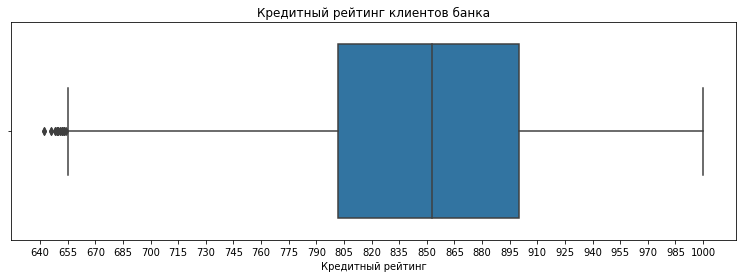

In [42]:
plt.figure(figsize=(13,4))
plt.title('Кредитный рейтинг клиентов банка')
sns.boxplot(x=df['score'])
plt.xlabel('Кредитный рейтинг')
plt.xticks(np.arange(640, 1015, 15))
display(df['score'].describe())

Есть записи о клиентах с кредитным рейтингом от 642 до 1000 баллов. Среднее количество - 848 баллов.\
У большинства клиентов от 800 до 900 баллов.\
При этом кредитный рейтинг ниже 655 баллов находится вне диапозона диаграммы размаха, за пределами "усов".\
Что это за клиенты?

In [43]:
df.query('score < 655')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
263,210814,652.0,Ярославль,М,34.0,0,NaN,1,1,1,188786.49,0
265,157448,649.0,Рыбинск,М,37.0,0,NaN,1,1,1,81942.85,0
533,146648,649.0,Ярославль,М,33.0,0,NaN,1,1,1,149318.49,0
921,179302,646.0,Ярославль,М,37.0,0,NaN,1,1,1,148297.71,0
1291,181159,651.0,Ярославль,М,35.0,0,NaN,1,1,1,180550.90,0
1304,157084,653.0,Рыбинск,М,53.0,0,NaN,2,1,0,72345.06,0
2501,208801,650.0,Ярославль,М,56.0,0,NaN,1,1,0,119643.06,0
2532,151179,642.0,Рыбинск,М,69.0,0,NaN,1,1,1,35917.41,0
3008,156535,652.0,Рыбинск,М,55.0,0,NaN,2,1,1,60374.86,0
3168,173067,649.0,Ярославль,М,46.0,0,NaN,1,1,1,121654.31,0


Нельзя утверждать, что такой кредитный рейтинг является выбросом - он может представлять любое значение в диапозоне до 1000. Однако, во-первых, у всех клиентов в списке отсутствует баланс, что не делает их "полезными" для исследования.

In [44]:
round((df.query('score < 655').shape[0] / df.shape[0] * 100), 2)

0.33

0.33% - это небольшое значение. К тому же, как сказано выше - они выбросами не являются, оставляю их в данных.

Ещё раз оцениваю среднее.

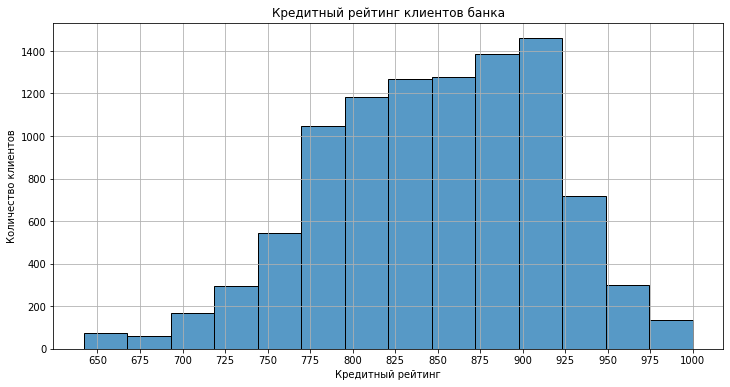

In [45]:
plt.figure(figsize=(12,6))
plt.title('Кредитный рейтинг клиентов банка')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Количество клиентов')
sns.histplot(df['score'], bins=14)
plt.xticks(np.arange(650, 1025, 25));
plt.grid()

In [46]:
check_means(df, 'score')

Среднее значение score по клиентам не в оттоке:845
Медиана score по клиентам не в оттоке:848

Среднее значение score по клиентам в оттоке:863
Медиана score по клиентам в оттоке:866


Заметно, что количество клиентов постепенно растёт с увеличением рейтинга, но после 900 баллов оно падает - далеко не у всех клиентов кредитный рейтинг близок к идеальному. Чем ближе рейтинг к идеальному - тем стремительнее заметно падение количества клиентов после отметки в 925 баллов.

Больше всего клиентов имеют кредитный рейтинг от 875 до 900 баллов. Средний рейтинг при оттоке - 863 балла, не в оттоке - 846 баллов.

**Анализ в разрезе оттока**

Теперь строю гистограмму с разбивкой на действующих и ушедших клиентов, чтобы выделить "отточные" интервалы. Поскольку выборки не равны между собой, тут используется не количество клиентов, а плотность распределения этого количества относительно каждой группы.

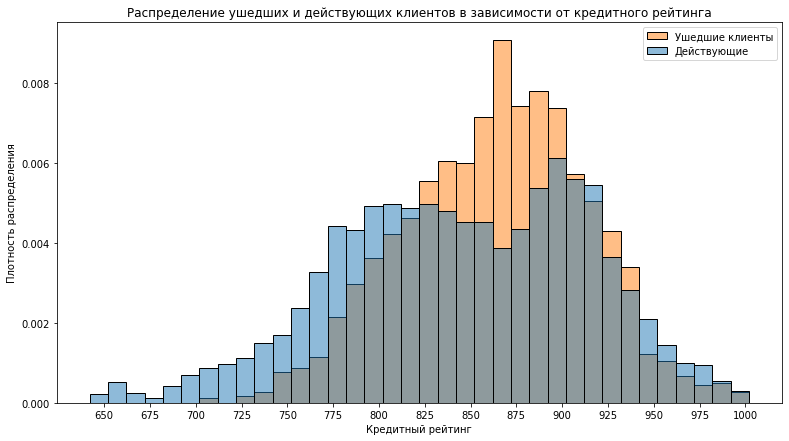

In [47]:
plt.figure(figsize=(13, 7))
plt.title('Распределение ушедших и действующих клиентов в зависимости от кредитного рейтинга')
sns.histplot(data=df, x='score', hue='churn', stat='density', common_norm=False, binwidth=10);
plt.xlabel('Кредитный рейтинг')
plt.xticks(range(650, 1025, 25))
plt.ylabel('Плотность распределения')
plt.legend(['Ушедшие клиенты','Действующие']);

На графике пересечение двух групп выделено серым цветом. Хорошо заметно, что среди клиентов с рейтингом до 825 баллов клиенты чаще остаются в банке, но потом ситуация меняется - клиенты с 825 баллов до 930 баллов уходят активнее, чем остаются. После 950 баллов действующие клиенты снова превалируют над ушедшими.

In [48]:
check_means(df, 'age')

Среднее значение age по клиентам не в оттоке:43
Медиана age по клиентам не в оттоке:40

Среднее значение age по клиентам в оттоке:41
Медиана age по клиентам в оттоке:39


**Корреляция с другими признаками**

Теперь оцениваю корреляцию рейтинга с остальными признаками, используя объявленную ранее функцию.


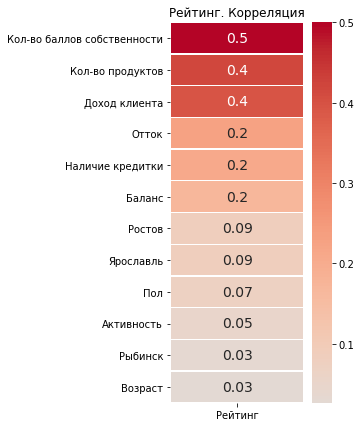

In [49]:
plot_corr(df_coded, 'score')

Согласно шкале Чеддока, есть заметная корреляция кредитного рейтинга с кол-вом баллов собственности, а также умеренная с доходом и ещё меньше - с количеством продуктов. Это неудивительно, поскольку кредитный рейтинг зависит и от количества собственности, и от дохода клиента. Корреляция с оттоком - слабая.

**Выводы по кредитному рейтингу**

Средний кредитный рейтинг клиента банка - 849 баллов. При этом у большинства клиентов в выборке от 875 до 900 баллов (в сравнении с аналогичными выборками).\
Установлено, что среди клиентов с рейтингом до 825 баллов клиенты чаще остаются, чем уходят, а среди клиентов с рейтингом от 825 до 930 баллов чаще уходят, чем остаются. После 930 баллов клиенты снова остаются в банке чаще, чем уходят.\
Средний рейтинг при оттоке - 863 балла, не в оттоке - 846 баллов.

Есть заметная корреляция рейтинга с баллами собственности, а также умеренная - с доходом и кол-вом продуктов.\
Корреляция с оттоком - слабая.

### Баланс клиентов

Вновь начинаю с диаграммы размаха и основной информации.

count        7663.00000
mean       828248.15983
std       1984247.69319
min             0.00000
25%        295498.98500
50%        524961.22000
75%        980801.49000
max     119113552.01000
Name: balance, dtype: float64

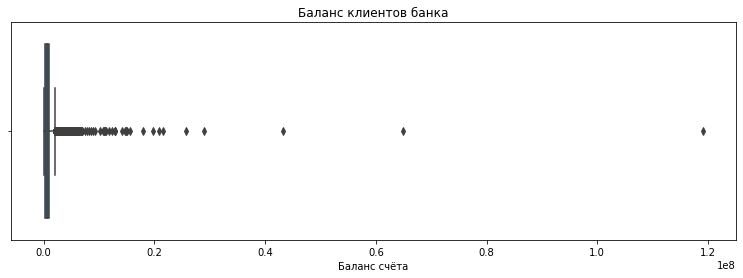

In [50]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

plt.figure(figsize=(13,4))
plt.title('Баланс клиентов банка')
sns.boxplot(x=df['balance'])
plt.xlabel('Баланс счёта')
display(df['balance'].describe())


В данных есть записи о клиентах, у которых на счёту хранится от 0 до 120 млн. рублей.\
Заметно большое количество выбросов, из-за которых диаграмма размаха смещена влево. От выбросов необходимо избавиться, но важно выбрать подходящий интервал для среза.\
О том, что эти значения являются выбросами, говорит и то, что среднее и медиана сильно отличаются: средний баланс клиента - 828 тысяч, а медианный - 525 тысяч. Медиана более устройчива к выбросам.\
Сначала отсекаю самые очевидные выбросы - записи о клиентах, у которых более 20 млн. на счету, но перед этим проверяю такие записи, чтобы убедиться, что записи корректны и они не выглядят как ошибка при выгрузке.

In [51]:
df.query('balance > 20000000')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1059,114103,894.00000,Ярославль,М,58.00000,4,64866210.15000,2,1,1,88861.60000,1
1846,114088,927.00000,Ярославль,М,57.00000,5,43277099.84000,3,0,1,82619.00000,0
4721,228786,1000.00000,Ярославль,М,45.00000,5,29008931.92000,2,0,1,811804.54000,0
6948,137434,1000.00000,Ярославль,М,37.00000,4,20906155.51000,2,1,1,947606.60000,1
7597,156149,900.00000,Ярославль,М,62.00000,5,119113552.01000,2,1,1,138041.31000,0
8484,221720,1000.00000,Ярославль,Ж,35.00000,5,21549943.63000,2,0,0,1051902.65000,0
9753,122015,885.00000,Ярославль,М,64.00000,4,25727761.86000,3,1,0,168746.90000,0


Все в порядке, записи выглядят естественно и не похожи на ошибки системы. Оцениваю процент потерь:

In [52]:
round((df.query('balance > 20000000').shape[0] / df.shape[0] * 100), 2)

0.07

Процент потерь менее 0.1%, отсекаю данных клиентов и строю диаграмму размаха вновь.

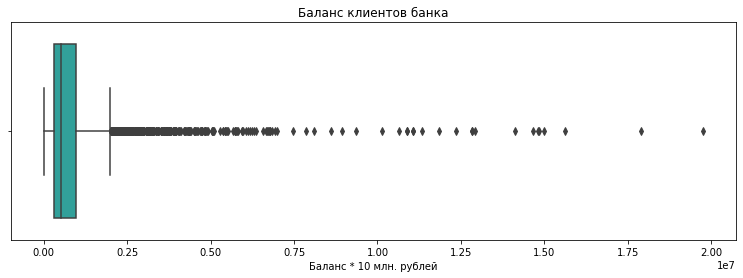

In [53]:
#цветовая палетта для визуализаций
my_p = ['lightseagreen', 'burlywood', 'tomato', 'steelblue', 'lightskyblue', 'y', 'firebrick']
balance_filtered = df.query('balance < 20000000')

plt.figure(figsize=(13,4))
plt.title('Баланс клиентов банка')
sns.boxplot(x=balance_filtered['balance'], palette=my_p)
plt.xlabel('Баланс * 10 млн. рублей');

Стало лучше, но выбросов всё ещё слишком много. Судя по диаграмме, баланс большинства клиентов не превышает 2 млн. Оцениваю, каков процент таких пользователей.

In [54]:
round((df.query('balance > 2000000').shape[0] / df.shape[0] * 100), 2)

4.3

4.3% - процент не самый малый, однако выбросы необходимо отсечь, поскольку они могут повлиять на анализ.\
Чтобы убедиться в том, что у большинства клиентов такой баланс - строю гистограмму.

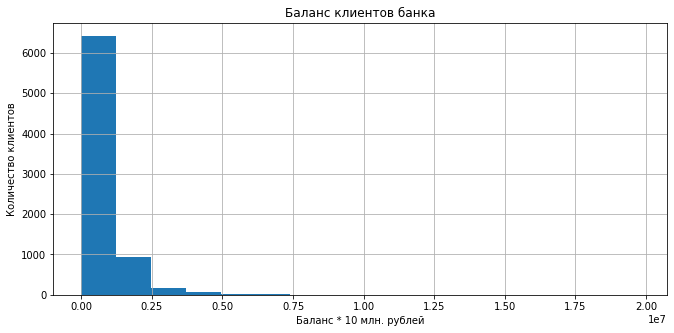

In [55]:
plt.figure(figsize=(11,5))
plt.title('Баланс клиентов банка')

(balance_filtered['balance']).hist(bins=16)

plt.xlabel('Баланс * 10 млн. рублей')
plt.ylabel('Количество клиентов');

Теория подтвердилась - у большинства клиентов баланс действительно менее 2 млн.\
Отсекаю выбросы и строю диаграмму размаха.

count      7236.00000
mean     613833.09800
std      431061.12836
min           0.00000
25%      286296.23500
50%      488931.18500
75%      872339.21000
max     1999799.18000
Name: balance, dtype: float64

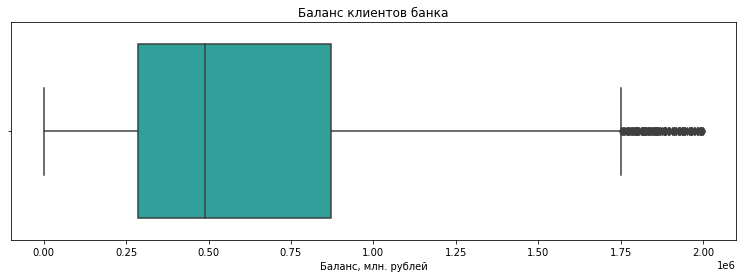

In [56]:
balance_filtered = df.query('balance < 2000000')

plt.figure(figsize=(13,4))
plt.title('Баланс клиентов банка')
sns.boxplot(x=balance_filtered['balance'], palette=my_p)
plt.xlabel('Баланс, млн. рублей');

display(balance_filtered['balance'].describe())

Теперь диаграмма размаха имеет нормальный вид. За её пределами находятся клиенты с доходом свыше 1.75 млн. рублей. Их также можно отсечь, как аномалии, но это может привести к большим потерям в данным. Оцениваю, сколько процентов от всех составляют клиенты с балансом свыше 1.75 млн:

In [57]:
round((df.query('balance > 1750000').shape[0] / df.shape[0] * 100), 2)

5.48

Вышло 5.5%. То есть клиенты с балансом свыше 1.75 млн составляют 5.5% от всех, а клиенты с балансом свыше 2 млн - 4.3%.\
Их необходимо исключить из анализа для оценки средних и медианных значений, но также нужно исследовать - фактически это самые богатые, ключевые клиенты банка.

In [58]:
top_balance = df.query('balance > 1750000')

Строю гистограмму по очищенным данным.

count      7236.00000
mean     613833.09800
std      431061.12836
min           0.00000
25%      286296.23500
50%      488931.18500
75%      872339.21000
max     1999799.18000
Name: balance, dtype: float64


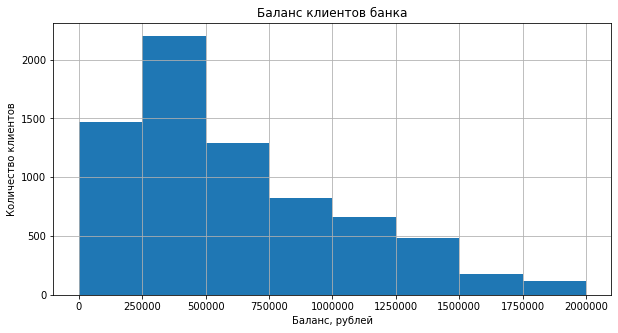

In [59]:
plt.figure(figsize=(10,5))
plt.title('Баланс клиентов банка')
plt.ticklabel_format(style='plain')
balance_filtered['balance'].hist(bins=8)
plt.xlabel('Баланс, рублей')
plt.ylabel('Количество клиентов');
print(balance_filtered['balance'].describe())

Гистограмма приобрела нормальный вид с нормальным распределением - постепенное возрастание и плавное убывание графика.\
Больше всего клиентов хранят на счету в банке от 250 до 500 тысяч рублей.\
Средний баланс - 614 тысяч, медиана по балансу - 489 тысяч. Медиана подходит больше, т.к. она более устойчива к выбросам, нежели среднее.

**Анализ в разрезе оттока**

Теперь строю гистограмму по очищенным данным, отдельно выделяя действующих клиентов и клиентов в оттоке, чтобы определить "отточные" интервалы.

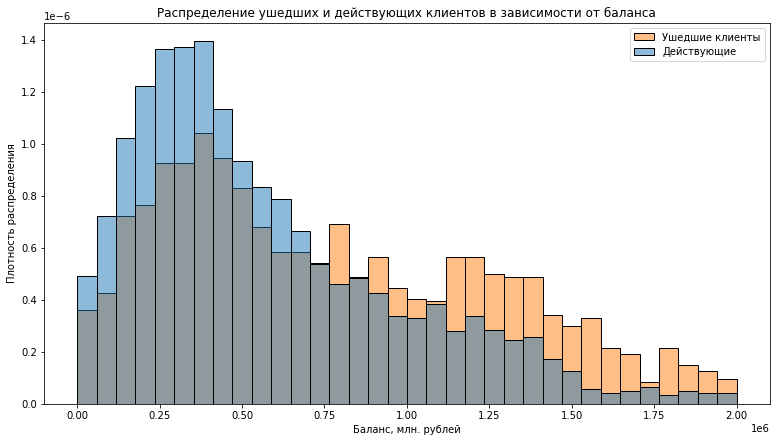

In [60]:
plt.figure(figsize=(13, 7))
plt.title('Распределение ушедших и действующих клиентов в зависимости от баланса')
sns.histplot(data=balance_filtered, x='balance', hue='churn', stat='density', common_norm=False);
plt.xlabel('Баланс, млн. рублей')
plt.ylabel('Плотность распределения')
plt.legend(['Ушедшие клиенты','Действующие']);

In [61]:
check_means(balance_filtered, 'balance')

Среднее значение balance по клиентам не в оттоке:570567
Медиана balance по клиентам не в оттоке:457525

Среднее значение balance по клиентам в оттоке:766728
Медиана balance по клиентам в оттоке:664994


На графике заметно, что клиенты с балансом до 750 тысяч чаще остаются в банке, чем уходят - а среди клиентов с доходом от 750 тысяч и до 2 миллионов заметно больше клиентов в оттоке, нежели оставшихся.

Средний баланс в оттоке - 766 тысяч рублей, без оттока - 570 тысяч рублей. Есть выбросы, к ним более устойчива медиана: в оттоке 663 тысячи по медиане, без оттока - 457 тысяч. Тем не менее, при проверке гипотез будут использоваться средние, поскольку данные очищены.

Строю аналогичную гистограмму для самых богатых клиентов банка.\
На диаграмме размаха выше были клиенты с балансом существенно выше остальных, однако их слишком мало для того, чтобы исследовать плотность распределения таких клиентов. Поэтому я изучаю срез клиентов с балансом от 2 до 10 млн. рублей.

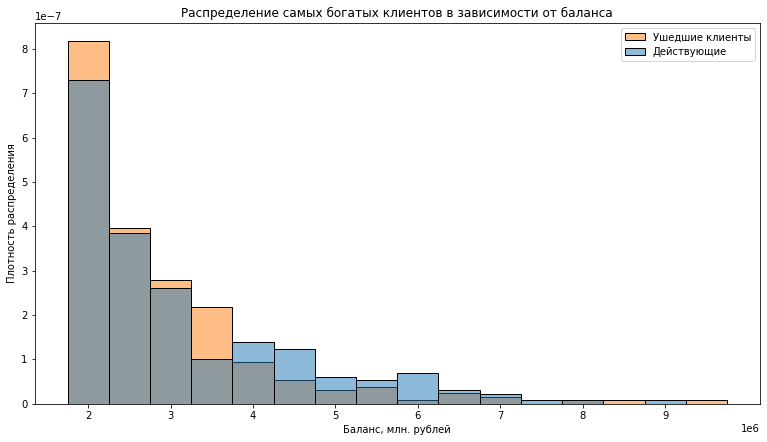

In [62]:
plt.figure(figsize=(13, 7))
plt.title('Распределение самых богатых клиентов в зависимости от баланса')
sns.histplot(data=top_balance.query('balance < 10000000'), x='balance', hue='churn', stat='density', common_norm=False, binwidth=500000);
plt.xticks(range(2000000, 10000000, 1000000))
plt.xlabel('Баланс, млн. рублей')
plt.ylabel('Плотность распределения')
plt.legend(['Ушедшие клиенты','Действующие']);

Здесь картина схожа с той, которую показывают остальные клиенты - сначала явно заметный "отточный" сегмент у клиентов с балансом от 2 до 4 млн, а после - "неотточный" сегмент клиентов с балансом от 4 до 7 миллионов.

**Корреляция**

Оцениваю корреляцию баланса с другими признаками.

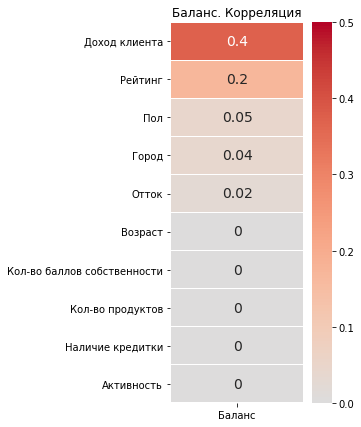

In [63]:
plot_corr(df, 'balance')

По шкале Чеддока есть умеренная корреляция с доходом и кредитным рейтингом.
Вероятно, с увеличением дохода клиента у него увеличивается баланс, и улучшается кредитный рейтинг.

**Вывод по балансу счета**\
Больше всего клиентов в банке хранят от 250 до 500 тысяч рублей на счету (по сравнению с аналогичными выборками по балансу). Средний баланс - 614 тысяч, медианный баланс - 489 тысяч. Ввиду наличия выбросов медиана лучше отражает суть, нежели среднее. При этом в выборке есть и гораздо большие балансы - от 2 млн и до 122 млн, однако они составляют менее 5% от клиентов в выборке.\
Средний баланс в оттоке - 766 тысяч рублей, без оттока - 570 тысяч рублей.

Также есть самые богатые клиенты с балансом от 2 до 120 млн. рублей. Здесь картина схожа с той, которую показывают остальные клиенты - сначала явно заметный "отточный" сегмент у клиентов с балансом от 2 до 4 млн, а после - "неотточный" сегмент клиентов с балансом от 4 до 7 миллионов. Клиентов с доходом свыше слишком мало, чтобы делать выводы.

Клиенты с балансом до 750 тысяч чаще остаются в банке, а клиенты с балансом от 750 тысяч и до 2 млн чаще уходят, чем остаются.

Есть заметная корреляции баланса с баллами собственности и умеренная - с кредитным рейтингом. возрастом и доходом.\
С оттоком корреляция слабая.

### Прогнозируемый доход клиентов

Последняя непрерывная величина для анализа - рассчитанный, или прогнозируемый доход клиентов.\
Аналогично начинаю с диаграммы размаха и основной информации.

count      9922.00000
mean     147898.87357
std      139365.46485
min        2546.30000
25%       75254.04500
50%      119735.43000
75%      174679.63750
max     1395064.45000
Name: est_salary, dtype: float64

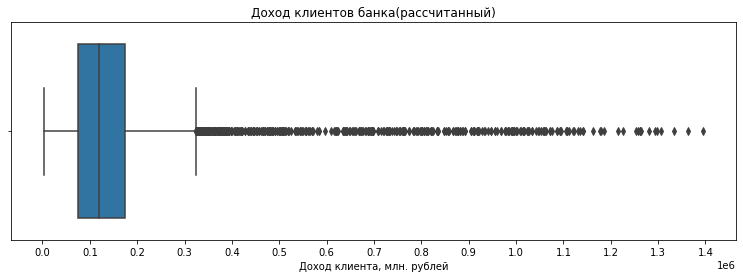

In [64]:
plt.figure(figsize=(13,4))
plt.title('Доход клиентов банка(рассчитанный)')
sns.boxplot(x=df['est_salary'])
plt.xlabel('Доход клиента, млн. рублей')
plt.xticks(range(0, 1500000, 100000))
display(df['est_salary'].describe())

Сразу заметно большое количество выбросов, диаграмма размаха ограничена дохом в 310 тысяч.\
Чтобы правильно определить срез, строю гистограмму:

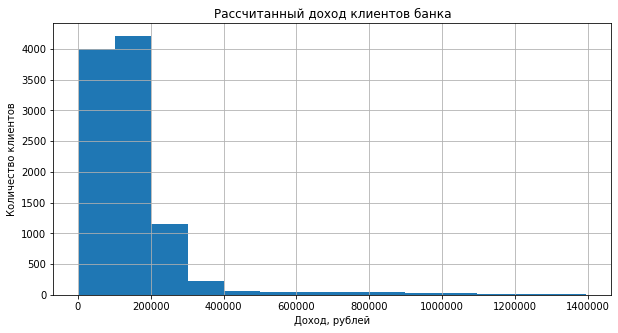

In [65]:
plt.figure(figsize=(10,5))
plt.title('Рассчитанный доход клиентов банка')
plt.ticklabel_format(style='plain')
plt.xlabel('Доход, рублей')
plt.ylabel('Количество клиентов');

df['est_salary'].hist(bins=14);

Исходя из гистограммы делаю вывод, что у большинства клиентов в выборке прогнозируемый доход не превышает 300 тысяч рублей в месяц. Считаю процент потерь при таком срезе, используя отметку в 310 тысяч, исходя из диаграммы размаха:

In [66]:
round((df.query('est_salary > 310000').shape[0] / df.shape[0] * 100), 2)

5.28

Потери составили 5.29% - значение не самое маленькое, однако выбросы могут повлиять на результаты анализа, поэтому, делаю срез и вновь строю диаграмму размаха.\
Распределение клиентов с самым высоким доходом рассмотрю отдельно ниже.

count     9398.00000
mean    122488.20691
std      63831.05388
min       2546.30000
25%      72966.29750
50%     115055.50000
75%     164118.50500
max     309499.78000
Name: est_salary, dtype: float64

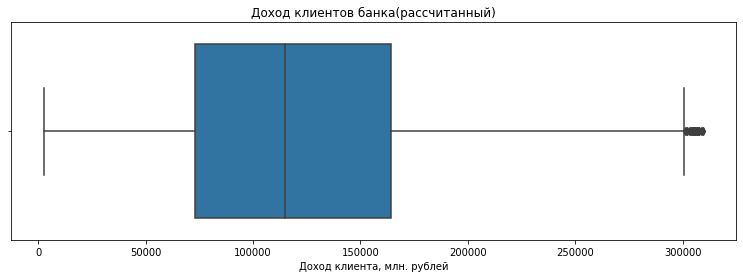

In [67]:
salary_filtered = df.query('est_salary <= 310000')

plt.figure(figsize=(13,4))
plt.title('Доход клиентов банка(рассчитанный)')
sns.boxplot(x=salary_filtered['est_salary'])
plt.xlabel('Доход клиента, млн. рублей')
display(salary_filtered['est_salary'].describe())

Теперь диаграмма размаха имеет нормальный вид, осталось немного выбросов, однако их уместно оставить, чтобы не терять ещё больше данных - особенно учитывая, что доход клиентов свыше 300 тысяч вполне реален.

Средний рассчитанный доход клиента - 122 тысячи рублей, медианный доход - 115 тысяч в месяц.\
Строю гистограмму по очищенным данным:

count     9398.00000
mean    122488.20691
std      63831.05388
min       2546.30000
25%      72966.29750
50%     115055.50000
75%     164118.50500
max     309499.78000
Name: est_salary, dtype: float64


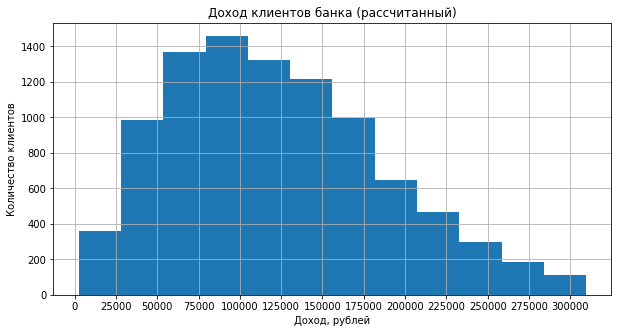

In [68]:
plt.figure(figsize=(10,5))
plt.title('Доход клиентов банка (рассчитанный)')

salary_filtered['est_salary'].hist(bins=12)
plt.xticks(range(0, 325000, 25000))
plt.xlabel('Доход, рублей')
plt.ylabel('Количество клиентов');
print(salary_filtered['est_salary'].describe())

Теперь гистограмма имеет вид нормального распределения.\
Больше всего клиентов в выборке имеют доход (прогнозируемый) от 75 до 100 тысяч рублей. Однако есть клиенты и с более высоким доходом - таких более 5% с доходом до 1.4 млн. в месяц.\
Средний доход клиентов в выборке - 122 тысячи, а медианный - 115 тысяч.

**Анализ дохода клиентов в разрезе оттока**

Теперь строю гистограмму по очищенным данным, разделяя действующих клиентов и ушедших клиентов.

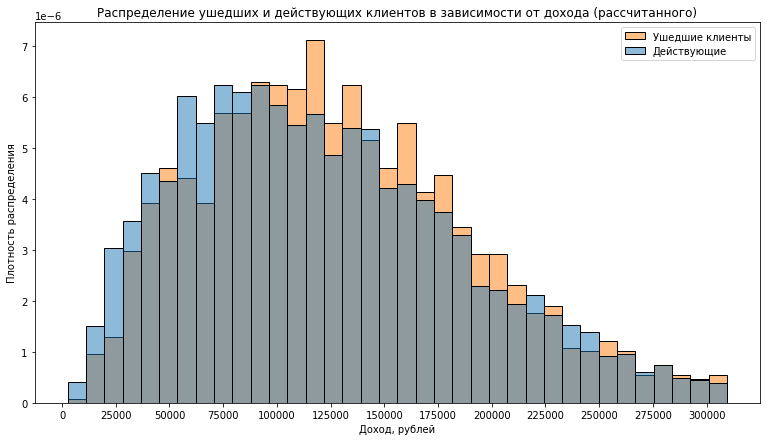

In [69]:
plt.figure(figsize=(13, 7))
plt.title('Распределение ушедших и действующих клиентов в зависимости от дохода (рассчитанного)')
sns.histplot(data=salary_filtered, x='est_salary', hue='churn', stat='density', common_norm=False);
plt.xticks(range(0, 325000, 25000))
plt.xlabel('Доход, рублей')
plt.ylabel('Плотность распределения')
plt.legend(['Ушедшие клиенты','Действующие']);

In [70]:
check_means(salary_filtered, 'est_salary')

Среднее значение est_salary по клиентам не в оттоке:121245
Медиана est_salary по клиентам не в оттоке:113188

Среднее значение est_salary по клиентам в оттоке:127989
Медиана est_salary по клиентам в оттоке:120966


В целом и ушедшие, и оставшиеся клиенты распределны схожим образом вне зависимости от дохода. Тем не менее, некоторые интервалы выделяются - среди клиентов с доходом до 80 тысяч рублей клиенты чаще остаются, а при доходе от 100 до 200 тысяч - чаще уходят. После этого разница незначительна.\
Средний доход в оттоке - 121 тысяча рублей в месяц. Средний доход вне оттока - 113 тысяч рублей в месяц.

**Клиенты с самым высоким доходом**

Отдельно изучаю распределение оттока и неоттока для клиентов с доходом более 300 000 в месяц.

In [71]:
top_salary = df.query('est_salary > 300000')

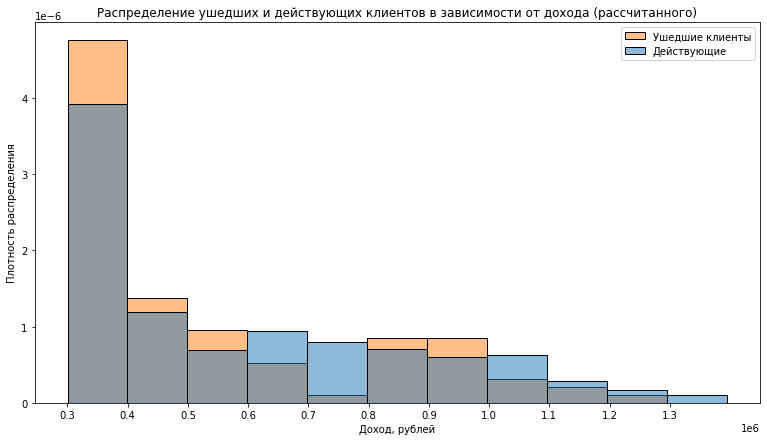

In [72]:
plt.figure(figsize=(13, 7))
plt.title('Распределение ушедших и действующих клиентов в зависимости от дохода (рассчитанного)')
sns.histplot(data=top_salary, x='est_salary', hue='churn', stat='density', common_norm=False);
plt.xticks(range(300000, 1400000, 100000))
plt.xlabel('Доход, рублей')
plt.ylabel('Плотность распределения')
plt.legend(['Ушедшие клиенты','Действующие']);

**Вывод:**\
Среди клиентов с самым высоким доходом клиенты, получающие 300-600К рублей и 800К - 1 млн. рублей, чаще уходят в отток, чем остаются.\
Клиенты с доходом 600-800К и 1-1.2 млн. чаще остаются, нежели уходят в отток.

**Корреляция**

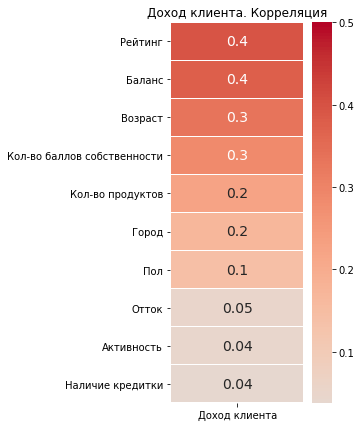

In [73]:
plot_corr(df, 'est_salary')

**Выводы по прогнозируемому доходу клиентов**

Больше всего клиентов в выборке имеют доход от 75 до 100 тысяч рублей (по сравнению с аналогичными интервалами по доходу). Есть около 5% клиентов с более высоким доходом до 1.4 млн в месяц.\
Средний доход клиента в выборке - 122 тысячи, а медианный - 115 тысяч.\
Средний доход в оттоке - 121 тысяча рублей в месяц. Средний доход вне оттока - 113 тысяч рублей в месяц.

Также есть клиенты с самым высоким доходом - от 300К до 1.2 млн. в месяц.
Клиенты, получающие 300-600К рублей и 800К - 1 млн. рублей, чаще уходят в отток, чем остаются.\
Клиенты с доходом 600-800К и 1-1.2 млн. чаще остаются, нежели уходят в отток.

В отток чаще попадают клиенты с доходом от 100 до 200 тысяч, а чаще остаются в банке клиенты с доходом до 80 тысяч. При этом разница в распределении оттока и неоттока выражена не слишком сильно.

Доход клиента заметно коррелирует с его возрастом - вероятно, доход растёт с увеличением стажа и опыта.\
У дохода умеренная корреляция с кредитным рейтингом и баллами собственности - логично, что больший доход ведёт к большему кредитному рейтингу и приобретению новой собственности.

Корреляция с оттоком почти не выражена.

### Оценка данных после очистки

После исследования непрерывных величин некоторые из них были исключены из анализа.\
Необходимо оценить, какой % данных утрачен после всех фильтраций.

In [74]:
df_filtered = df.query('score >= 655').query('balance < 2000000 or balance.isna()').query('est_salary <= 310000')
df_filtered.shape[0] / df.shape[0] * 100

91.3727071155009

Общие потери в данных составили менее 9%, допустимое значение.

## Анализ дискретных величин

### Город клиента

Сколько клиентов в каждом городе?

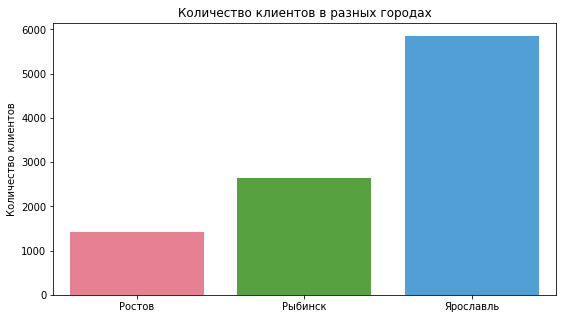

In [75]:
cities = df.groupby('city').agg({'userid':'count'}).reset_index()
plt.figure(figsize=(9,5))
plt.title('Количество клиентов в разных городах')

sns.barplot(data=cities, x=cities['city'], y='userid', palette='husl')

plt.xlabel('')
plt.ylabel('Количество клиентов');

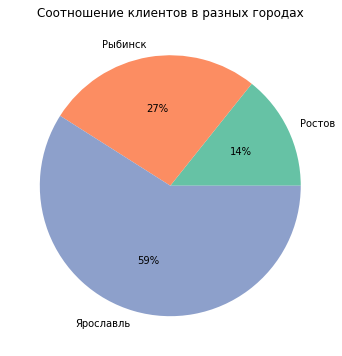

In [76]:
cities = df.groupby('city').agg({'userid':'count'}).reset_index()
plt.figure(figsize=(6,6))
plt.title('Соотношение клиентов в разных городах')

colors = sns.color_palette('Set2')
plt.pie(data=cities, labels = 'city', x='userid', colors=colors, autopct='%.0f%%');

В Ярославле клиентов больше всего - больше половины от всей выборки.\
Потом идёт Рыбинск - треть выборки. Меньше всего клиентов в Ростове.

Строю график, в котором посчитана доля оттока в каждом из городов.\
Красная линия обозначает средний уровень оттока по банку без разделения по городам.

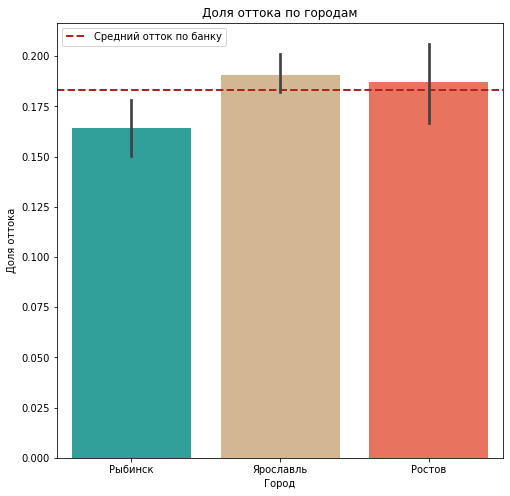

In [77]:
# Средний уровень оттока по банку
ch = df['churn'].sum() / df['churn'].count()

plt.figure(figsize=(8,8), frameon=False)
plt.title('Доля оттока по городам')
plt.axhline(ch, color=my_p[6], linestyle='dashed', linewidth='2', label='Средний отток по банку')
plt.legend(loc=2);

sns.barplot(data=df, x='city', y='churn', palette=my_p)
plt.xlabel('Город')
plt.ylabel('Доля оттока');

**Корреляция**

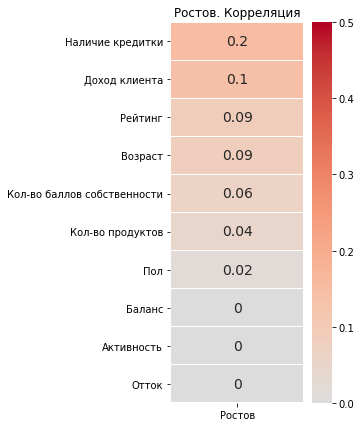

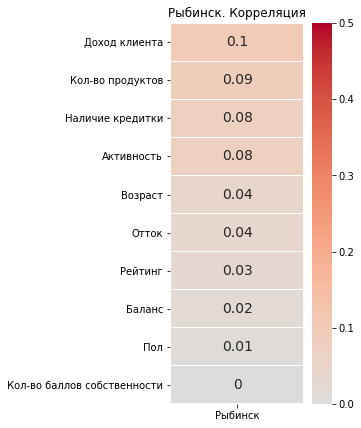

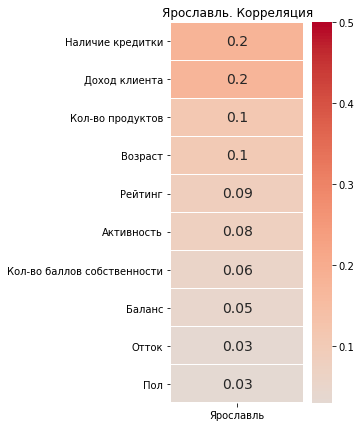

In [78]:
for i in['city_Ростов', 'city_Рыбинск', 'city_Ярославль']:
    plot_corr(df_coded, i)

Значимой корреляции с другими признаками не наблюдается - она либо слабая, либо вовсе не выражена.

**Вывод**\
Большинство клиентов - из Ярославля, более 50% от всей выборки. Меньше всего клиентов - в Рыбинке, Ростов на втором месте.\
Из всех городов только у Рыбинка отток ниже, чем в среднем по банку. В Ростове и Ярославле отток выше среднего. Самый высокий отток - в Ярославле.

Интересно, что Ростов и Ярославль коррелируют с наличием кредитки, а вот Рыбинск - нет.

Заметная корреляция с другими признаками, включая отток, не обнаружена. Есть слабая корреляция с доходом и кол-вом продуктов.

### Пол

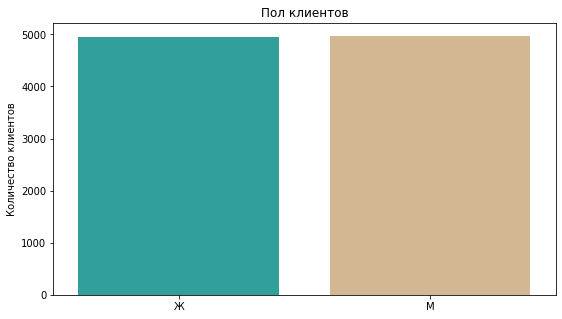

In [79]:
gender = df.groupby('gender').agg({'userid':'count'}).reset_index()
plt.figure(figsize=(9,5))
plt.title('Пол клиентов')

sns.barplot(data=gender, x=gender['gender'], y='userid', palette=my_p)

plt.xlabel('')
plt.ylabel('Количество клиентов');

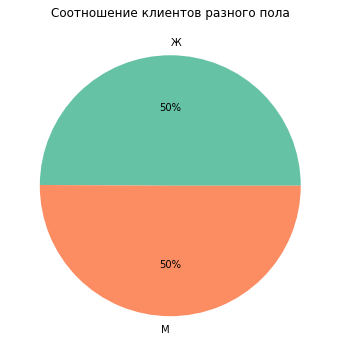

In [80]:
cities = df.groupby('city').agg({'userid':'count'}).reset_index()
plt.figure(figsize=(6,6))
plt.title('Соотношение клиентов разного пола')

colors = sns.color_palette('Set2')
plt.pie(data=gender, labels = 'gender', x='userid', colors=colors, autopct='%.0f%%');

Соотношение мужчин и женщин - ровно 50 на 50, выборки равны.

Аналогичным образом строю график с разбивкой по полу, возможно, тут тоже будут неожиданные результаты?

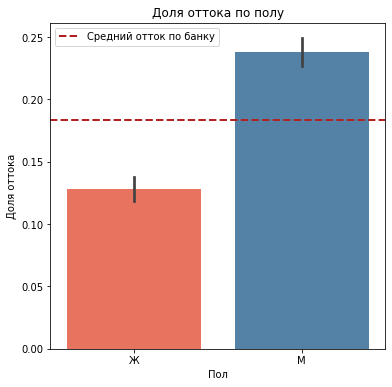

In [81]:
plt.figure(figsize=(6,6), frameon=False)
plt.title('Доля оттока по полу')
plt.axhline(ch, color=my_p[6], linestyle='dashed', linewidth='2', label='Средний отток по банку')
plt.legend(loc=2);

sns.barplot(data=df, x='gender', y='churn', palette=my_p[2:])
plt.xlabel('Пол')
plt.ylabel('Доля оттока');

**Корреляция**

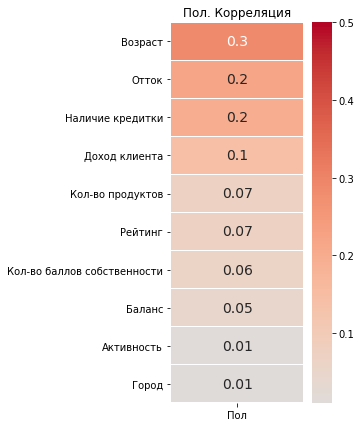

In [82]:
plot_corr(df, 'gender')

**Вывод**\
В выборке равное количество мужчин и женчин.\
Среди женщин доля оттока почти в 2 раза ниже, чем среди мужчин. При этом отток женщин меньше среднего по банку, а отток мужчин - выше.

Есть умеренная корреляция пола с возрастом - либо в одной из групп клиенты старше, либо корреляция ложная. Тем не менее, нет ярко выраженной корреляции с оттоком.

###  Возраст

Какие уникальные значения возраста содержатся в данных?

In [83]:
df['age'].sort_values().unique()

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 86.])

Есть все значения от 18 до 86 лет, исключение - отсутствуют записи о 85-летних клиентах. Возможно, 4 пропуска в колонке age как раз соответствуют 85-летним клиентам, но достоверно установить это нельзя при текущих данных.

In [84]:
df['age'].describe()

count   9922.00000
mean      42.72556
std       12.17218
min       18.00000
25%       33.00000
50%       40.00000
75%       51.00000
max       86.00000
Name: age, dtype: float64

Минимальный возраст клиента - 18 лет, максимальный - 86. Всего есть 68 уникальных значений.\
Я использую эту информацию, чтобы разделить диаграмму на 2 графика для удобства просмотра.

Также для понимания распределения возрастов может понадобиться гистрограмма.

In [85]:
df[df['age'] == 36]['age'].count()

412

ModeResult(mode=array([36.]), count=array([412]))

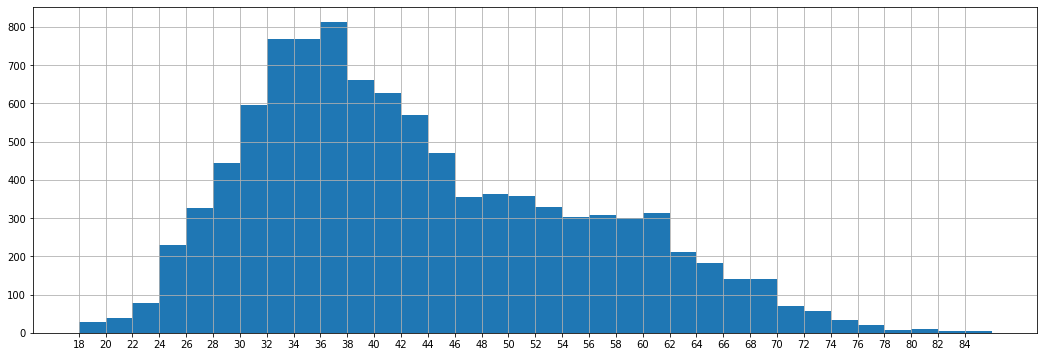

In [86]:
plt.figure(figsize=(18,6))
df['age'].hist(bins=34)
plt.xticks(range(18, 86, 2));
scipy.stats.mode(df['age'], keepdims=True)

Больше всего клиентов в выборке имеют возраст от 36 до 38 лет по сравнению с аналогичными выборками.\
При этом распределение не является нормальным - оно смещено в сторону более молодых клиентов. Это логично, т.к. более молодые люди больше ориентированы на работу с банками.
Мода по возрасту - 36 лет, это самое частое значение в выборке.

Строю нормированную гистограмму для выделения отточных интервалов.

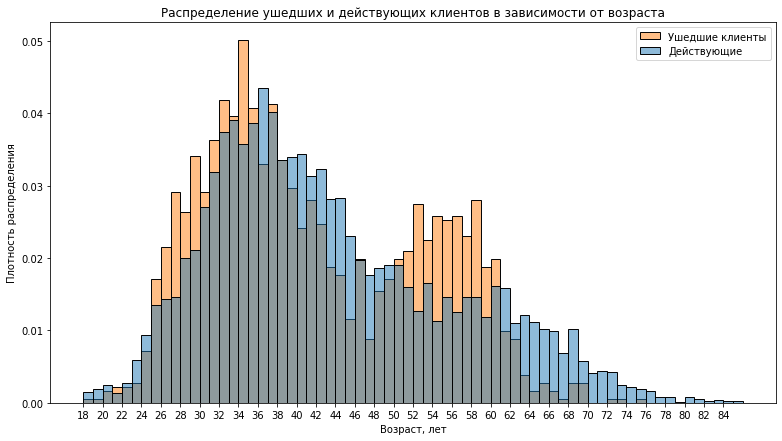

In [87]:
plt.figure(figsize=(13, 7))
plt.title('Распределение ушедших и действующих клиентов в зависимости от возраста')
sns.histplot(data=df, x='age', hue='churn', stat='density', common_norm=False, binwidth=1);
plt.xticks(range(18, 86, 2))
plt.xlabel('Возраст, лет')
plt.ylabel('Плотность распределения')
plt.legend(['Ушедшие клиенты','Действующие']);

In [88]:
check_means(df, 'age')

Среднее значение age по клиентам не в оттоке:43
Медиана age по клиентам не в оттоке:40

Среднее значение age по клиентам в оттоке:41
Медиана age по клиентам в оттоке:39


**Корреляция**

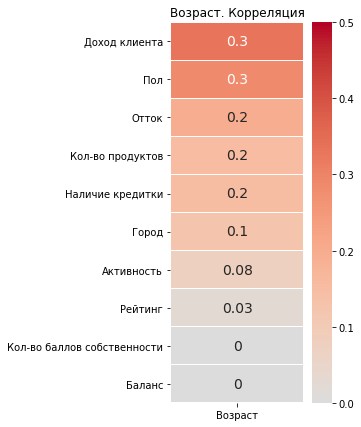

In [89]:
plot_corr(df, 'age')

**Вывод по возрасту**

Большинство клиентов - в возрасте 36 лет.

Как видно из графика, клиенты некоторых возрастов показывают отток выше, чем в среднем по банку.\
Самый высокий уровень оттока - среди 54-летних клиентов. Он почти в 2 раза выше среднего оттока.\
В целом клиенты всех возврастов в интервале от 50 до 60 показывают отток заметно выше среднего по банку.

 Высокий отток также показывают также 21-летние клиенты.\
Помимо этого, отток выше среднего по банку на интервале 25-35 лет. При этом от 25 до 29 лет отток выражен сильнее, чем от 30 до 35 - там дела обстоят лучше.

Также есть интервалы, где отток, наоборот, показывает оптимистичную картину, становясь всё меньше среднего оттока по банку. Клиенты от 38 до 49 лет показывают отток меньше среднего по банку, при этом всё обстоит особенно неплохо в интервале от 40 до 45 лет.

Ещё один примечательный интервал - клиенты от 61 года и старше. Исходя из гистрограмы, как минимум до 70 лет в данных не менее 100 наблюдений, поэтому дело не в размере выборок. После 70 лет показатели оттока очень оптимистичны, однако наблюдений там не очень много. Тем не менее, общая тенденция - положительная.

По этой же причине не рассматривается интервал 18-24 года, потому что там также меньше 100 наблюдений, и показатели разнятся. Общая тенденция не видна.

Установлена заметная корреляция между возрастом и количеством продуктов. Характер этой корреляции пока неясен, предположительно, клиенты с возврастом склонны оформлять больше продуктов.\
Корреляция с оттоком - слабая.

Средний возраст в оттоке - 41 год, не в оттоке - 43 года.

**Также обнаружена** аномалия, вероятно, технического характера, строка 8957 в изначальном датасете - *прим. для технических рекомендаций*

### Баллы собственности

Сколько есть вариантов баллов собственности?

In [90]:
df['equity'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

От 0 до 9 баллов. Сколько клиентов находится в каждой из групп?

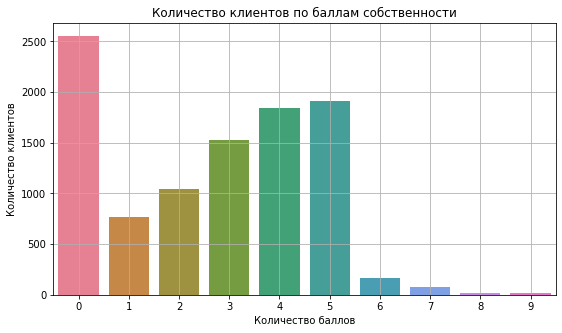

In [91]:
balls = df.groupby('equity').agg({'userid':'count'}).reset_index()
plt.figure(figsize=(9,5))
plt.title('Количество клиентов по баллам собственности')
sns.barplot(data=balls, x='equity', y='userid', palette='husl')
plt.grid()
plt.xlabel('Количество баллов')
plt.ylabel('Количество клиентов');

Больше всего клиентов не имеют ни одного балла собственности. После этого от 1 до 5 баллов заметен постоянный рост, в то время как 6 и более баллов имеет очень малая часть клиентов, в сравнении с клиентами, имеющими до 5 баллов.\
Необходимо исключить из графика по оттоку слишком малые выборки, чтобы лучше увидеть общую тенденцию - выборки от 6 баллов и более несравнимо меньше остальных, поэтому их не исследую на графике оттока.

Строю этот график:

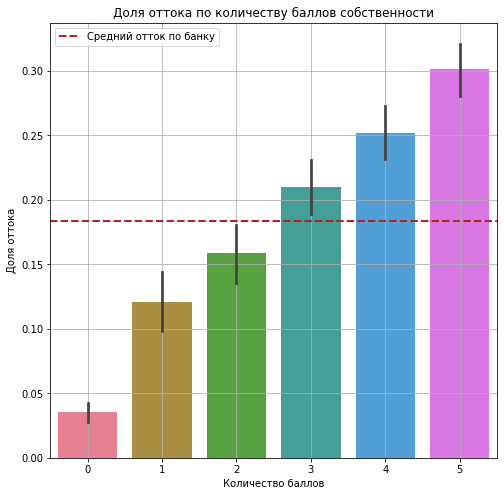

In [92]:
plt.figure(figsize=(8,8))
plt.title('Доля оттока по количеству баллов собственности')
plt.axhline(ch, color=my_p[6], linestyle='dashed', linewidth='2', label='Средний отток по банку')
plt.legend(loc=2);

sns.barplot(data=df.query('equity < 6'), x='equity', y='churn', palette='husl')
plt.grid()
plt.xlabel('Количество баллов')
plt.ylabel('Доля оттока');

**Корреляция**

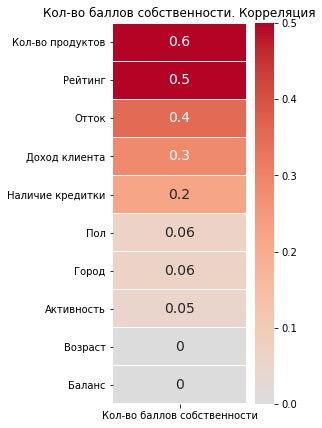

In [93]:
plot_corr(df, 'equity')

**Вывод**: Среди клиентов больше всего тех, кто не имеет ни одного балла собственности.\
На графике видна ярко выраженная тенденция: чем больше баллов собственности имеют клиенты - тем выше их доля оттока относительно среднего оттока по банку. У клиентов, не имеющих ни одного балла, показатель оттока самый низкий - примерно в 4 раза меньше, чем в среднем по банку. После отметки в 3 балла отток начинает превышать средний отток по банку.

Есть значительная корреляция баллов собственности с кредитным рейтингом, что неудивительно - кредитный рейтинг зависит от кол-ва собственности. Таже есть умеренная корреляция с количеством продуктов и с оттоком.

В целом доля оттока растет прямо пропорционально количеству баллов собственности.\
Как получение высокого балла собственности связано с желанием клиента уйти из банка?

### Количество продуктов банка

Также оцениваю набор значений:

In [94]:
df['products'].sort_values().unique()

array([1, 2, 3, 4, 5])

Значения от 1 до 5. Каковы размеры выборок?

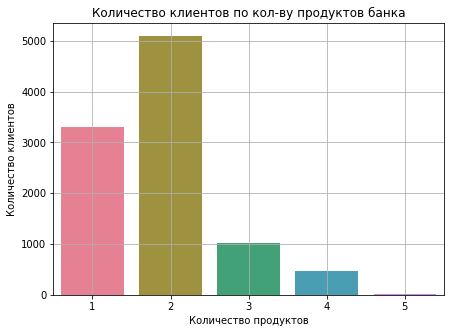

In [95]:
prod = df.groupby('products').agg({'userid':'count'}).reset_index()
plt.figure(figsize=(7,5))
plt.title('Количество клиентов по кол-ву продуктов банка')
sns.barplot(data=prod, x='products', y='userid', palette='husl')
plt.grid()
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов');

Из графика видно, что больше всего клиентов, имеют 2 продукта - это половина всей выборки.\
Потом идут клиенты с 1 продуктом - более треть выборки.\
После 2 продуктов количество клиентов сильно убывает, клиентов с 5 продуктами очень мало.

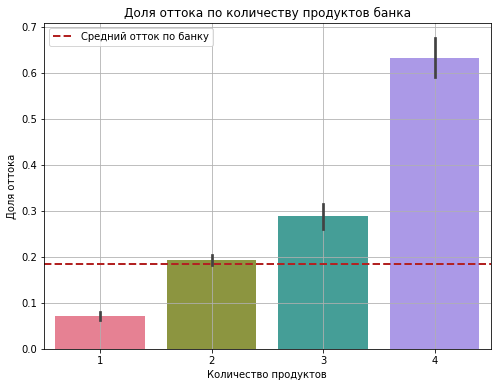

In [96]:
plt.figure(figsize=(8,6))
plt.title('Доля оттока по количеству продуктов банка')
plt.axhline(ch, color=my_p[6], linestyle='dashed', linewidth='2', label='Средний отток по банку')
plt.legend(loc=2);

sns.barplot(data=df.query('products != 5'), x='products', y='churn', palette='husl')
plt.grid()
plt.xlabel('Количество продуктов')
plt.ylabel('Доля оттока');

**Корреляция**

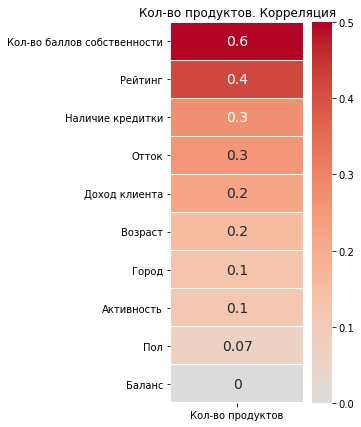

In [97]:
plot_corr(df, 'products')

**Вывод**: У большинства клиентов банка - 2 продукта.\
На графике тенценция такая же, как и с баллами собственности. Чем больше количество продуктов - тем выше доля оттока. Лишь клиенты с 1 продуктом, не считая кредитку при её наличии, показывают отток меньше среднего по банку, причём более чем в 2 раза меньше. У клиентов с 2 и более продуктами отток выше среднего по банку и увеличивается с каждым новым продуктом.\
Среди клиентов с 4 продуктами уровень оттока гораздо выше, чем в остальных группах - он более чем в 3 раза превышает средний отток по банку.

Выражена заметная корреляция между количеством продуктов и возрастом, а также наличием кредитки. Помимо этого есть умеренная корреляция с оттоком и баллами собственности.

В целом видна взаимосвязь - доля оттока клиентов с 2 продуктами немного выше средней по банку, но после она очень интенсивно растет с каждым новым продуктом. Возможно, на фоне этого в выборке много клиентов с 2 продуктами, но их количество стремительно падает также с каждым новым продуктом.

### Наличие кредитной карты

Каков размер выборок?

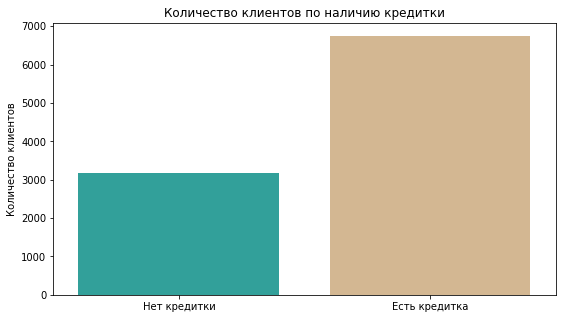

In [98]:
card = df.groupby('credit_card').agg({'userid':'count'}).reset_index()
plt.figure(figsize=(9,5))
plt.title('Количество клиентов по наличию кредитки')

sns.barplot(data=card, x=card['credit_card'].replace({0:'Нет кредитки', 1:'Есть кредитка'}), y='userid', palette=my_p)

plt.xlabel('')
plt.ylabel('Количество клиентов');

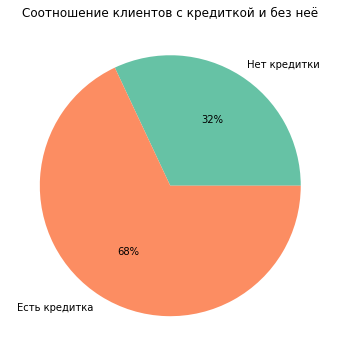

In [99]:
plt.figure(figsize=(6,6))
plt.title('Соотношение клиентов c кредиткой и без неё')

colors = sns.color_palette('Set2')
plt.pie(data=card, labels = card['credit_card'].replace({0:'Нет кредитки', 
                                                         1:'Есть кредитка'}), x='userid', colors=colors, 
                                                                                      autopct='%.0f%%');

Кредитка есть более чем у 2/3 всех клиентов банка.

Какой уровень оттока среди клиентов в разрезе наличия кредитной карты?

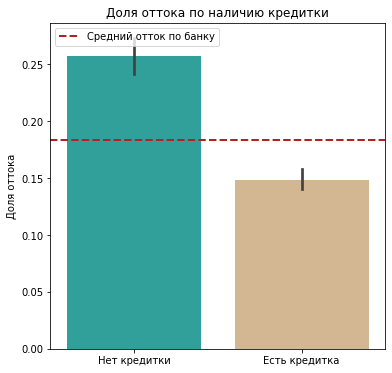

In [100]:
plt.figure(figsize=(6,6), frameon=False)
plt.title('Доля оттока по наличию кредитки')
plt.axhline(ch, color=my_p[6], linestyle='dashed', linewidth='2', label='Средний отток по банку')
plt.legend(loc=2);

sns.barplot(data=df, x=df['credit_card'].replace({0:'Нет кредитки', 1:'Есть кредитка'}), y='churn', palette=my_p)
plt.xlabel('')
plt.ylabel('Доля оттока');

**Корреляция**

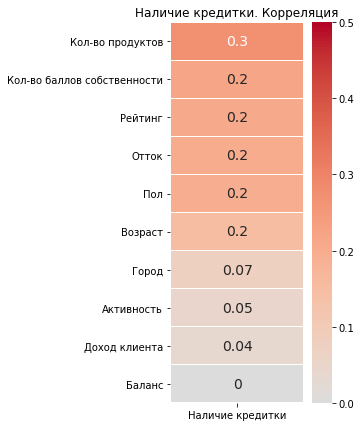

In [101]:
plot_corr(df, 'credit_card')

**Вывод**: Более чем у 2/3 клиентов есть кредитка.\
Доля оттока среди тех, у кого кредитки нет, заметно выше среднего уровня оттока по банку.\
Доля оттока среди клиентов, имеющих кредитку, ниже средней по банку.

Есть выраженная корреляция наличия кредитки и количества продуктов, возможно дело в том, что клиенты с кредиткой лучше удерживаются в банке, что приводит к увеличению количества продуктов.

Судя по всему, кредитка эффективно работает в качестве "удерживающего" фактора. 

### Активность клиентов

Есть клиенты, которые проявляли активность в последнее время, а есть те, кто её не проявлял.\
Оцениваю размеры выборок.

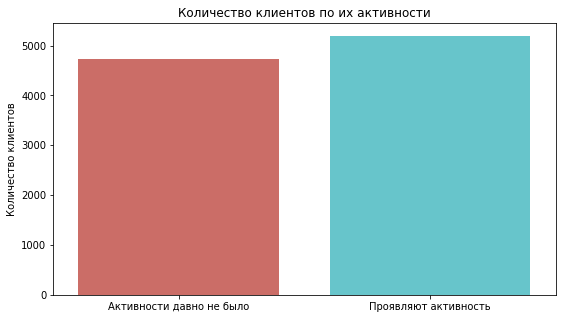

In [102]:
act = df.groupby('last_activity').agg({'userid':
                                       'count'}).reset_index()
plt.figure(figsize=(9,5))
plt.title('Количество клиентов по их активности')

sns.barplot(data=act, x=act['last_activity'].replace({0:'Активности давно не было', 
                                                      1:'Проявляют активность'}), y='userid', palette=('hls'))

plt.xlabel('')
plt.ylabel('Количество клиентов');

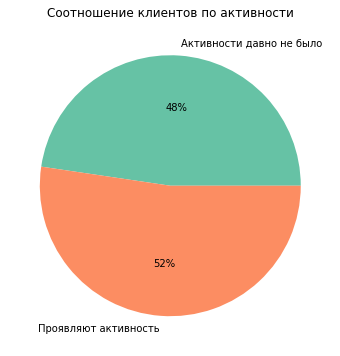

In [103]:
plt.figure(figsize=(6,6))
plt.title('Соотношение клиентов по активности')

colors = sns.color_palette('Set2')
plt.pie(data=act, labels = act['last_activity'].replace({0:'Активности давно не было', 
                                                         1:'Проявляют активность'}), x='userid', colors=colors, 
                                                                                      autopct='%.0f%%');

Выборки почти равны, то есть почти половина клиентов в выгрузке давно не проявляли активности.\
Оцениваю уровень их оттока:

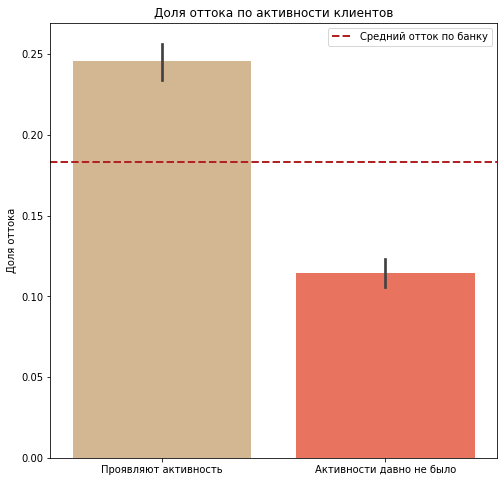

In [104]:
plt.figure(figsize=(8,8), frameon=False)
plt.title('Доля оттока по активности клиентов')
plt.axhline(ch, color=my_p[6], linestyle='dashed', linewidth='2', label='Средний отток по банку')
plt.legend(loc=2);

sns.barplot(data=df, x=df['last_activity'].replace({0:'Активности давно не было', 1:'Проявляют активность'}), y='churn', palette=my_p[1:])
plt.xlabel('')
plt.ylabel('Доля оттока')
plt.legend(loc=1);

**Корреляция**

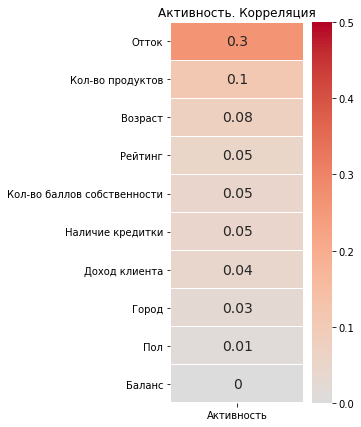

In [105]:
plot_corr(df, 'last_activity')

**Вывод**: количество активных и неактивных клиентов почти одинаково, однако активных - больше.\
Отток среди активных заметно выше среднего оттока по банку, а вот клиенты, которые давно не проявляли активность, имеют уровень оттока заметно ниже среднего - как минимум на треть.

Есть умеренная корреляция активности клиента с оттоком.

Возможно, отток как-то связан с опытом взаимодействия клиента с банком, поскольку неактивные пользователи попадают в отток заметно реже.

## Общая корреляция всех признаков

Для того, чтобы увидеть картинку целоком, строю общий график корреляции по данным.\

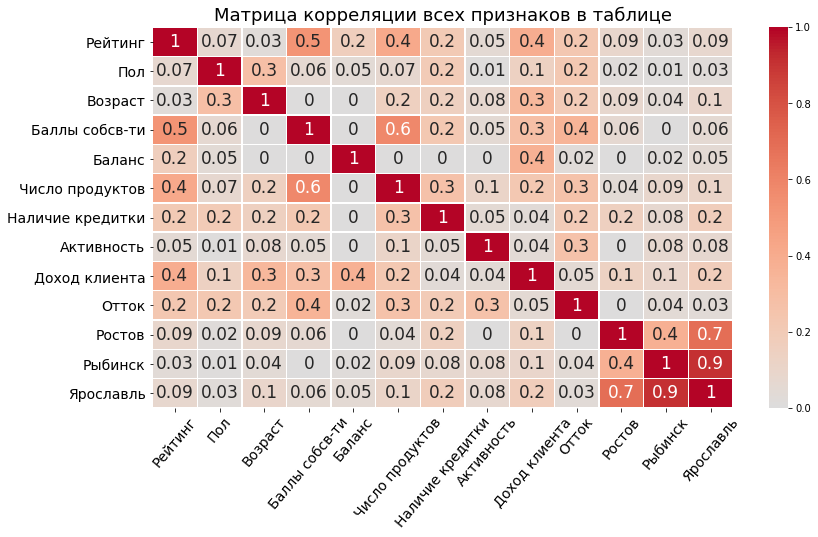

In [106]:
corr_matrix = df_coded.loc[:, df_coded.columns !='userid'].phik_matrix(
                                 interval_cols = ['score', 'balance', 'est_salary'])

corr_names = {'gender':'Пол', 'age':'Возраст', 'equity':'Баллы собсв-ти', 
             'balance':'Баланс', 'products':'Число продуктов', 'credit_card':'Наличие кредитки', 
             'last_activity':'Активность', 'est_salary':'Доход клиента', 'churn':'Отток', 'score':'Рейтинг',
              'city_Рыбинск':'Рыбинск', 'city_Ростов':'Ростов', 'city_Ярославль':'Ярославль'}
names = corr_matrix.index.tolist().copy()
for i, item in enumerate(names):
    names[i] = corr_names.get(item)
corr_matrix.index = names
corr_matrix.columns = names

plt.figure(figsize=(13,7))
plt.title('Матрица корреляции всех признаков в таблице', fontsize=18)

heatmap = sns.heatmap(corr_matrix, annot=True, 
            cmap='coolwarm', fmt='.1g', 
            center=0, vmax=1, linewidth=0.4,
            annot_kws={'size':17}, xticklabels = names)

plt.xticks(rotation=50, fontsize=14)
plt.yticks(fontsize=14);

Опираясь на шкалу Чеддока - никакие из признаков не имеют высокой корреляции. Максимальная корреляция в таблице составляет 0.6 и является заметной, но не высокой. Тем не менее корреляция может быть нелинейна, и из-за этого она не достигает высокого уровня в расчётах выше.

Выделяется заметная корреляция:
1. Корреляция числа продуктов с кол-вом баллов собственности.

умеренные корреляции:
4. Корреляция рейтинга с кол-вом баллов собственности.
3. Корреляция рейтинга с доходом и числом продуктов.
1. Корреляция баланса с доходом клиента
5. Корреляция баллов собственности с оттоком.

И слабые:

1. Корреляция рейтинга с балансом, наличием кредитки и оттоком.
3. Корреляция пола с возрастом, наличием кредитки и оттоком
4. Корреляция возраста с полом, числом продуктов, наличием кредитки и оттоком
5. Корреляция баллов собственности с активностью и доходом
7. Корреляция числа продуктов с наличием кредитки, оттоком, доходом и возрастом.
8. Корреляция наличия кредитки с рейтингом, полом, возрастом, баллама собст-ти, числом продуктов и оттоком
9. Корреляция активности с оттоком.
10. Корреляция дохода с балансом, продуктами и городом.

### Корреляция оттока с остальными признаками

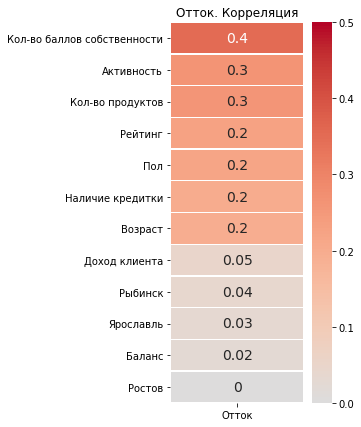

In [107]:
plot_corr(df_coded, 'churn')

### Общие выводы по корреляции

Если обобщить детали корреляции всех величин, а также результаты исследовательского анализа, выясняется:

**Количество продуктов банка** заметно коррелирует с возрастом, а также наличием кредитки и умеренно - **с оттоком** и баллами собственности.\
У большинства клиентов банка - 2 продукта.\
У клиентов с 2 и более продуктами отток выше среднего по банку, и он увеличивается геометрически с каждым новым продуктом.

**Кредитный рейтинг** заметно коррелирует с баллами собственности, и умеренно - с доходом и кол-вом продуктов.\
Средний рейтинг - 849 баллов. У большинства клиентов в выборке от 875 до 900 баллов.\
Клиенты с рейтингом до 825 баллов, а также с рейтингом свыше 930 баллов, чаще остаются, чем уходят, а клиенты с рейтингом от 825 до 930 баллов чаще уходят, чем остаются.

**Баланс** клиентов заметно коррелирует с баллами собственности, и умеренно - с кредитным рейтингом, возрастом и доходом.\
Больше всего клиентов в банке хранят от 250 до 500 тысяч рублей на счету. Средний баланс - 614 тысяч, медианный б- 489 тысяч.\
Клиенты с балансом до 750 тысяч чаще остаются в банке, а клиенты с балансом от 750 тысяч и до 2 млн чаще уходят, чем остаются.

**Доход клиента** заметно коррелирует с его возрастом и умеренно - с кредитным рейтингом и баллами собственности.\
Больше всего клиентов в выборке имеют доход от 75 до 100 т. р.\
Средний доход клиента в выборке - 122 тысячи, а медианный - 115 тысяч.\
В отток чаще попадают клиенты с доходом от 100 до 200 тысяч, а чаще остаются в банке клиенты с доходом до 80 тысяч. 

**Возраст клиента** заметно коррелирует с доходом и с полом.\
Большинство клиентов - в возрасте 36 лет.\
В целом клиенты в интервале от 25 до 35 и от 50 до 60 показывают отток заметно выше среднего по банку. Также отток на высоком уровне у 54-летних и 21-летних. Однако они не входят в интервалы оттока или не оттока и могут быть обусловены статистической ошибкой.\
Клиенты от 38 до 49 лет показывают отток меньше среднего по банку, от 40 до 45 лет - особенно меньше среднего. Также клиенты старше 61 имеют отток меньше, чем по банку.

**Баллы собственности** заметно коррелируют с кредитным рейтингом, и умеренно - с количеством продуктов и **с оттоком**.\
Среди клиентов больше всего тех, кто не имеет ни одного балла собственности.\
Вместе с количеством баллов собственности геометрически растёт уровень оттока. У клиентов, не имеющих ни одного балла, показатель оттока самый низкий - примерно в 4 раза меньше, чем в среднем по банку. После отметки в 3 балла отток начинает превышать средний отток по банку.

**Наличие кредитки** заметно коррелирует с количеством продуктов.\
Более чем у 2/3 клиентов есть кредитка.\
Доля оттока среди тех, у кого кредитки нет, заметно выше среднего уровня оттока по банку.\
Доля оттока среди клиентов, имеющих кредитку, ниже средней по банку.\
Судя по всему, кредитка эффективно работает в качестве "удерживающего" фактора. 

**Активность клиентов** умеренно коррелирует **с оттоком**.\
количество активных и неактивных клиентов почти одинаково, однако активных - больше.\
Отток среди активных заметно выше среднего оттока по банку, а клиенты, которые давно не проявляли активность, имеют уровень оттока заметно ниже среднего - как минимум на треть.\
Возможно, отток как-то связан с опытом взаимодействия клиента с банком, поскольку неактивные пользователи попадают в отток заметно реже.

**Пол клиентов** умеренно коррелирует с возрастом.\
В выборке равное количество мужчин и женщин.\
Среди женщин доля оттока почти в 2 раза ниже, чем среди мужчин. При этом отток женщин меньше среднего по банку, а отток мужчин - выше.

**Город** клиента не проявляет какой-либо заметной корреляции.

## Составление портрета клиента

Собираю результаты исследовательского анализа, объединяя отточные интервалы непрерывных признаков и самые отточные значения категорий дискретных признаков, принимая во внимание результаты анализа корреляции.\
В дальнейшем из признаков, входящих в портрет, будут сформированы сегменты.

### Портрет клиента из оттока

Характеристики клиентов банка, составляющих отток.\
Жирным выделены признаки с наиболее высокой корреляцией, у остальных признаков корреляция слабая.\
Признаки без выраженной корреляции - курсивом.

* Пол - мужчины
* Возраст - от 25 до 35, либо от 50 до 60 лет. Средний возраст- 41 год
* Баланс - от 750 тысяч до 2 млн. рублей. Средний - 766 тысяч рублей
* Кредитный рейтинг - от 825 до 930 баллов. Среднее - 863 балла
* Нет кредитки
* **Кол-во баллов собственности - 3 и более**
* **Продуктов банка - 2 и более**
* **Проявляют активность**
* *доход - от 100 до 200 тысяч рублей в месяц. Средний - 121 тысяча рублей*
* *город - Рыбинск или Ярославль*






### Портрет клиента, не входящего в отток

Характеристики клиентов банка, составляющих отток.\
Аналогично жирным признаки с наиболее высокой корреляцией, у остальных признаков корреляция слабая.\
Признаки без выраженной корреляции - курсивом.

* Пол - женщины
* Возраст - от 38 до 49 лет, либо 61+. Средний возраст - 43 года
* Баланс - до 750 тысяч. Средний - 570 тысяч рублей
* Кредитный рейтинг - до 825 баллов, либо 930+. Среднее - 846 баллов
* Есть кредитка
* **Кол-во баллов собственности - до 2 включительно**
* **Только 1 продукт банка**
* **Не проявляют активности**
* *доход - до 100 тысяч рублей в месяц. Средний - 113 тысяч рублей*
* *город - Ростов*


## Статистический анализ

Перехожу к тестированию гипотез - это позволит определить, являются ли выделенные ранее различия статистически значимыми.

Для тестирования гипотез использую отфильтрованный от выбросов датафрейм и формирую 2 выборки:

In [108]:
churn = df_filtered.query('churn == 1')
no_churn = df_filtered.query('churn == 0')

ch_size = churn.shape[0]
no_ch_size = no_churn.shape[0]

print(f'Размер выборки "клиенты в оттоке": {ch_size}')
print(f'Размер выборки "клиенты вне оттока": {no_ch_size}')

Размер выборки "клиенты в оттоке": 1578
Размер выборки "клиенты вне оттока": 7488


Уровень статистической значимости устанавливаю стандартный - 0.05.

In [109]:
alpha = .05

### Гипотеза о среднем доходе

H0: Средний доход клиентов в оттоке равен среднему доходу клиентов, не входящих в отток.\
H1: Средний доход клиентов в оттоке не равен среднему доходу клиентов вне оттока.

Нужно выбрать метод тестирования.\
Если рассматривать t-test, то у него есть условия применения:
1. Генеральные совокупности не зависят друг от друга
2. Выборочные средние нормальны распределены - это следует из ЦПТ и объёма выборок более чем в 1500 значений
3. Есть уверенность в равенстве дисперсий (если нет, то параметр equal_var = False)

Однако по результатам исследовательского анализа присутствуют сверхбогатые клиенты, и данное распределение нельзя назвать нормальным. В таких ситуациях применим u-критерий Манна-Уитни, поскольку он работает не с конкретными значениями, а с их рангами, сравнивая 2 выборки.

Чтобы получить достоверные результаты теста, применяю оба критерия дважды: для изначальных данных и для очищенных от выбросов.

In [110]:
churn_no_filter = df.query('churn == 1')
no_churn_no_filter = df.query('churn == 0')

In [146]:
ttest(churn_no_filter['est_salary'], no_churn_no_filter['est_salary'], alpha, equ_var=False, alt='two-sided')

p-value составляет 0.8645271013531297, это больше уровня стат. значимости 0.05.
Не получилось отвергнуть нулевую гипотезу


In [145]:
ttest(churn_no_filter['est_salary'], no_churn_no_filter['est_salary'], alpha, equ_var=False,  alt='two-sided')

p-value составляет 0.8645271013531297, это больше уровня стат. значимости 0.05.
Не получилось отвергнуть нулевую гипотезу


t-test дал одинаковый результат и по очищенным, и по сырым данным.\
Теперь оцениваю через u-критерий:

In [157]:
mannwhitneyu(churn['est_salary'], no_churn['est_salary'], alt='two-sided')

p-значение:  0.08170299641697797
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [160]:
mannwhitneyu(churn_no_filter['est_salary'], no_churn_no_filter['est_salary'],  alt='two-sided')

p-значение:  0.0002061360185759959
Отвергаем нулевую гипотезу: разница статистически значима


t-test не нашёл разницы между сырыми и очищенными данными, а вот u-критерий - нашёл.\
Дополнительно убеждаюсь в том, что распределение дохода в данных не нормально:

In [172]:
check_shapiro(churn_no_filter['est_salary'])

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [171]:
check_shapiro(churn['est_salary'])

p-значение:  6.820595694306917e-16
Отвергаем нулевую гипотезу: распределение не нормально


In [174]:
check_shapiro(no_churn_no_filter['est_salary'])

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [175]:
check_shapiro(no_churn['est_salary'])

p-значение:  5.141672127062151e-37
Отвергаем нулевую гипотезу: распределение не нормально


Во всех четырёх случаях распределение не нормально, что говорит о том, что не стоит доверять результатам t-test'а.

Определяю направление различия в среднем дохоже между выборками.\
H0: Средний доход клиентов в оттоке равен среднему доходу клиентов, не входящих в отток.\
H1: Средний доход клиентов в оттоке выше, чем у клиентов вне оттока.


In [181]:
mannwhitneyu(churn_no_filter['est_salary'], no_churn_no_filter['est_salary'],  alt='greater')

p-значение:  0.00010306800928799795
Отвергаем нулевую гипотезу: разница статистически значима


**Вывод**\
Для очищенных от выбросов данных оба теста дали отрицательный результат - и t-критерий, и z-критерий показали, что нет оснований для отвергания нулевой гипотезы.\
Однако результаты тестов по неочищенным от выбросов данным разошлись: u-критерий Манна-Уитни указал на наличие статистически значимой разница между выборками.\
Тем не менее, важно понимать, что одним из условий применения t-test'а является нормальное распределение в выборке. Анализ критерия Шапиро-Уика показал, что во всех выборках распределение не нормально. Именно по этой причине t-test не сработал корректно и не нашёл разницы между очищенными и сырыми данными, а u-критерий помог эту разницу обнаружить. В данном случае стоит доверять результатам u-критерия, учитывая также то, что он корректно работает с не нормальным распределением.\
**Есть статистически значимая разница в среднем доходе клиентов в оттоке и клиентов, не попавших в отток.**
**У клиентов в оттоке он выше, чем у клиентов вне оттока**.

### Гипотеза о среднем кредитном рейтинге

H0: Средний кредитный рейтинг клиентов в оттоке равен среднему рейтингу клиентов, не входящих в отток.\
H1: Средний рейтинг клиентов в оттоке больше, чем у клиентов вне оттока.

Аналогично предудыщей гипотезе есть основания для применения t-test'a.

In [115]:
ttest(churn['score'], no_churn['score'], alpha, equ_var=False, alt='greater')

p-value составляет 6.217342019553438e-19, это меньше уровня стат. значимости 0.05.
Отвергаем нулевую гипотезу


**Вывод**: Нулевая гипотеза не подтвердилась. Существует статистически значимое различие среднего кредитного рейтинга между клиентами в оттоке и вне оттока. Есть основания считать, что клиенты в оттоке в среднем имеют кредитный рейтинг больше, чем клиенты вне оттока.

### Гипотеза о среднем балансе

H0: Средний баланс клиентов в оттоке равен среднему балансу клиентов, не входящих в отток.\
H1: Средний баланс клиентов в оттоке больше, чем у клиентов вне оттока.

В отфильтрованных данных есть пропуски в балансе, необходимо сверить размеры выборок с учётом этого.

In [116]:
ch_size_bal = churn.query('balance >= 0').shape[0]
no_ch_size_bal = no_churn.query('balance >= 0').shape[0]
print(f'Размер выборки "клиенты в оттоке" с указанным балансом: {ch_size_bal}')
print(f'Размер выборки "клиенты вне оттока" с указанным балансом: {no_ch_size_bal}')

Размер выборки "клиенты в оттоке" с указанным балансом: 1570
Размер выборки "клиенты вне оттока" с указанным балансом: 5594


Размеры выборок всё ещё позволяют использовать ttest, однако по поводу равенства дисперсий также есть сомнения ввиду неравенства выборок.

In [117]:
ttest(churn['balance'].dropna(), no_churn['balance'].dropna(), alpha, equ_var=False, alt='greater')

p-value составляет 1.4361458355751366e-45, это меньше уровня стат. значимости 0.05.
Отвергаем нулевую гипотезу


**Вывод**: нулевая гипотеза не подтвердилась. Существует статистически значимое различие между средним балансом клиентов в оттоке и вне оттока. Есть основания считать, что у клиентов в оттоке в среднем баланс больше, чем у клиентов вне оттока.

### Гипотеза о среднем возрасте

Несмотря на то, что возраст рассматривался как дискретная величина - он в то же время может рассматриваться как непрерывная величина, это свойство использую при проведении стат. теста.

H0: Средний возраст клиентов в оттоке равен среднему возрасту клиентов, не входящих в отток.\
H1: Средний возраст клиентов в оттоке меньше, чем у клиентов вне оттока.

По аналогичной причине применяю t-test.

In [118]:
ttest(churn['age'].dropna(), no_churn['age'].dropna(), alpha, equ_var=False, alt='less')

p-value составляет 7.25499292338297e-08, это меньше уровня стат. значимости 0.05.
Отвергаем нулевую гипотезу


**Вывод:** Нулевая гипотеза не подтвердилась. Есть стат. значимое различие между средним возрастом клиентов в оттоке и вне оттока. Есть основания считать, что средний возвраст клиентов в оттоке меньше, чем средний возраст клиентов вне оттока.

### Гипотеза о количестве продуктов

Перехожу к другому виду гипотез - они будут рассматривать взаимосвязь категорий в разрезе оттока. Здесь будет исследоваться зависимость/независимость признака оттока и других признаков.

Поскольку речь идёт о проверке гипотезы относительно категориальной переменной - ttest не подойдёт, в этом случае применяется хи-квадрат тест на независимость, ведь:
* Выборки отток-неотток независимы между собой
* Общее количество наблюдений превышает 50

H0: Различия в количестве продуктов между клиентами в оттоке и не в оттоке статистически незначимы. Две переменные независимы.\
H1: Различия в кол-ве продуктов у клиентов в оттоке и не в оттоке статистически значимы. Переменные зависимы друг от друга.

In [119]:
hi_square_churn(df_filtered, 'products')

p-значение:  8.088240674433236e-162
Отвергаем нулевую гипотезу: есть основания считать, что между категориями существует связь


**Вывод**: Есть основания считать, что существует взаимосвязь между оттоком и количеством продуктов у клиентов.

### Гипотеза о баллах собственности

Аналогичным образом оцениваю взаимосвязь баллов собственности и оттока.

H0: Различия в количестве баллов между клиентами в оттоке и не в оттоке статистически незначимы. Две переменные независимы.\
H1: Различия в кол-ве баллов у клиентов в оттоке и не в оттоке статистически значимы. Переменные зависимы друг от друга.

In [120]:
hi_square_churn(df_filtered, 'equity')

p-значение:  2.5850549199216376e-113
Отвергаем нулевую гипотезу: есть основания считать, что между категориями существует связь


**Вывод**: Есть основания считать, что существует взаимосвязь между оттоком и количеством баллов собственности у клиентов.

### Вторая  гипотеза о количестве продуктов

Согласно исследовательному анализу, клиенты с 1 продуктом чаще остаются в банке, нежели попадают в отток, чем клиенты с 2 и более продуктами.\
В этом случае необходимо проверить гипотезу о равенстве долей. Если некоторая доля генеральной совокупности обладает признаком, а другая её часть — нет, об этой доле можно судить по выборке из генеральной совокупности. Как и в случае со средним, выборочные доли будут нормально распределены вокруг настоящей, это следует из ЦПТ.\
Таким образом используется расчёт z-критерия и оценка pvalue, чтобы оценить, является ли разница в долях "отточных" клиентов статистически значимой.

Формирую две группы - в первую входят клиенты с 1 продуктом, а во вторую - клиенты, у которых больше продуктов.\
Оцениваю размеры выборок:

In [121]:
gr1 = df_filtered.query('products < 2')
gr2 = df_filtered.query('products > 1')
print(gr1.shape[0], gr2.shape[0])

2955 6111


In [122]:
check_z(gr1, gr2)

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод**: различие в доле оттока между клиентами, имеющими 1 продукт, и клиентами с 2 и более продуктами, является статистически значимым. Доля оттока во втором случае больше.

### Вторая гипотеза о кол-ве баллов собственности

Аналогично предыдущей гипотезе проверяю результаты исследовательского анализа, гласящие, что клиенты с 3 и более баллами собственности уходят в отток чаще, чем клиенты с меньшим количеством баллов.\
Также формирую 2 группы и оцениваю размеры выборок:

In [123]:
gr1 = df_filtered.query('equity < 3')
gr2 = df_filtered.query('equity > 2')
print(gr1.shape[0], gr2.shape[0])

3976 5090


In [124]:
check_z(gr1, gr2)

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод**: Различие в доле оттока между клиентами, имеющими 2 и менее балла собственности, и клиентами, имеющими более 2х баллов, является статистически значимым. Между долями клиентов в оттоке есть значимая разница, во втором случае доля оттока выше.

## Промежуточные итоги

Был проведён исследовательский анализ данных, который позволил выявить "отточные" интервалы для непрерывных признаков, и "отточные" категории для категориальных признаков.\
После этого проведён статистический анализ с проверкой гипотез, чтобы подтвердить или опровергнуть значимость каких-либо взаимосвязей между оттоком и другими признаками.\
Для дальнейшей сегментации клиентов обобщаю все выводы и результаты, полученные ранее.

**Общая корреляция оттока и других признаков**\
Отток больше всего коррелирует с количеством баллов собственности, числом продуктов, с активностью клиентов и кредитным рейтингом.

**Город клиента**\
Отток в Рыбинске - ниже среднего по банку, а отток в Ростове и Ярославле - выше среднего.\
Город коррелирует с доходом, ведь в разных городах - разная оплата труда. Также есть корреляцияя с количеством продуктов.\
Большинство клиентов - из Ярославля, самого "отточного" города.

**Пол клиента**\
Отток среди женщин ниже среднего по банку, а среди мужчин - выше. При этом пол коррелирует с возрастом и с оттоком.\
Корреляция с оттоком, а также проверка гипотезы о взаимосвязи оттока с полом показали, что этот фактор связан с оттоком.


**Возраст**\
Клиенты в интервале от 25 до 35 и от 50 до 60 показывают отток заметно выше среднего по банку.\
Клиенты от 38 до 49 лет показывают отток меньше среднего по банку, от 40 до 45 лет - особо меньше среднего.\
Также клиенты старше 61 имеют отток меньше, чем по банку.\
Проверка стат. гипотезы показала, что средний возраст клиентов в оттоке меньше, чем средний возраст вне оттока.\
Возраст коррелирует с доходом, что связано с увеличением трудового стажа, и с полом.

**Количество продуктов банка**\
У клиентов с 2 и более продуктами отток выше среднего по банку, и он увеличивается геометрически с каждым новым продуктом.\
У большинства клиентов банка - 2 продукта, а это "отточная" категория.\
Проверка стат. гипотезы показала, что действительно есть разница в доле оттока клиентов между двумя группами (Клиенты с 1 продуктом и клиенты с 2 и более продуктами).\
Заметно коррелирует с возрастом, а также наличием кредитки, баллами собственности и оттоком.

**Кредитный рейтинг**\
Клиенты с рейтингом до 825 баллов, а также с рейтингом свыше 930 баллов, чаще остаются, чем уходят, а клиенты с рейтингом от 825 до 930 баллов чаще уходят, чем остаются. Стат. анализ подтвердил, что в среднем кредитный рейтинг клиентов в оттоке выше, чем кредитный рейтинг клиентов вне оттока.\
У большинства клиентов в выборке от 875 до 900 баллов, то есть они входят в "отточный" интервал.\
Заметно коррелирует с баллами собственности, и умеренно - с доходом и кол-вом продуктов.\
Кредитный рейтинг - составная метрика, которая связана и с баллами собственности, и с доходом, и с кол-вом продуктов, если это кредитные продукты - они улучшают кредитную историю.



**Баланс** \
Клиенты с балансом до 750 тысяч чаще остаются в банке, а клиенты с балансом от 750 тысяч и до 2 млн чаще уходят, чем остаются.\
Стат. анализ подтвердил, что средний баланс "отточных" клиентов выше, чем баланс "не отточных" клиентов.\
Больше всего клиентов в банке хранят от 250 до 500 тысяч рублей на счету, что входит в "не отточный" интервал.\
Заметно коррелирует с баллами собственности, и умеренно - с кредитным рейтингом, возрастом и доходом.\
Корреляция понятна - больший доход позволяет приобрести собственность, а также влияет на кредитный рейтинг, который ведёт к покупке соственности в кредит. Отсюда и корреляция с кредитным рейтингом и доходом.

**Доход клиента** \
В отток чаще попадают клиенты с доходом от 100 до 200 тысяч, а чаще остаются в банке клиенты с доходом до 80 тысяч. 
Тем не менее, стат. анализ не подтвердил гипотезу о том, что есть значимая разница в среднем доходе клиентов в оттоке и не в оттоке.
Заметно коррелирует с его возрастом и умеренно - с кредитным рейтингом и баллами собственности.


**Баллы собственности**\
У клиентов, имеющих до 2 баллов собственности включительно, доля оттока ниже средней по банку, а при большем количестве продуктов доля оттока выше средней. При этом с количеством продуктов доля оттока растёт геометрически. Стат. анализ подтвердил эту взаимосвязь.\
Заметно коррелируют с кредитным рейтингом, и умеренно - с количеством продуктов и с оттоком.

**Наличие кредитки**\
Доля оттока среди тех, у кого кредитки нет, заметно выше среднего уровня оттока по банку. Если кредитка есть - отток ниже среднего по банку.Более чем у 2/3 клиентов есть кредитка.\
заметно коррелирует с количеством продуктов.\
Судя по всему, кредитка эффективно работает в качестве "удерживающего" фактора. 

**Активность клиентов**\
Отток среди активных заметно выше среднего оттока по банку, а клиенты, которые давно не проявляли активность, имеют уровень оттока заметно ниже среднего - как минимум на треть.\
Коррелирует **с оттоком**.\
Возможно, отток как-то связан с опытом взаимодействия клиента с банком, поскольку неактивные пользователи попадают в отток заметно реже.

В целом заметна тенденция: оттоку больше подверждены клиенты, которые активно взаимодействуют с банком. Если клиент проявляет активность, оформляет больше новых продуктов, хранит на балансе больше средств - он становится более подвержен оттоку.\
Возможно, дело в том, что клиенты уходят из банка, получая более высокий кредитный рейтинг. Поскольку с долей оттока связано количество баллов собственности, доход,  баланс и непосредственно кредитный рейтинг. По каким-то причинам клиенты, у которых эти метрики выше, чаще уходят из банка.

## Сегментация. Отток

Отточные интервалы и категории определены, перехожу к формированию сегментов.\
По ТЗ размер одного сегмента от 300 до 2000 клиентов.\
Необходимо выделить сегменты, в которых доля оттока будет минимум в 2 раза выше, чем в среднем по банку.

### Сегмент 1

Исходя из результатов стат. анализа, и кредитный рейтинг, и количество продуктов связаны с оттоком. Доля оттока растёт геометрически росту количества продуктов.\
Клиенты с хорошим кредитным рейтингом, проявляющие активность и имеющие много продуктов должны быть лояльны и просто так из банка не уходят. Причём активнее с каждым новым продуктом.\
Тем не менее, каждый второй клиент в выборке ушёл в отток. Это может быть связано с пользовательским опытом клиентов - возможно, количество продуктов влияет на интерфейс или техническую составляющую. Другая возможная причина - резкие смены маркетинговых компаний или тарифов, что могло подорвать лояльность таких клиентов. Кроме этого, причина может крыться в том, что клиенты были привлечены другим банком, который дает преимущества для перевода всех продуктов клиента с хорошим кредитным рейтингом. Например, на кредит с условием перевода оборотов.

Кредитный рейтинг - **от 825 до 930**\
Количество продуктов банка - **более 1го**\
Количество баллов собственности - **более 2х**\
В последнее время проявляли **активность**


In [125]:
s1 = df.query('825 <= score <= 930').query('products > 1').query('last_activity==1').query('equity > 2')
s1_d = make_seg(s1)

Размер сегмента: 1495 клиентов
Доля оттока: 0.51, или 51.0%.
Средний отток по банку: 0.18


### Сегмент 2

Мужчины с балансом от 750 000 до 2 млн рублей.\
По каким-то причинам кредитоспособные мужчины уходят в отток куда чаще среднего по банку. Возможно, дело в тарифных условиях, недостаточных плюшках или же в работе службы поддержки.

Баланс - **от 750 т.рублей до 2 млн рублей**\
Пол - **Мужской**

In [126]:
s2 = df.query('gender == "М"').query('750000 <= balance <=2000000')
s2_d = make_seg(s2)

Размер сегмента: 1096 клиентов
Доля оттока: 0.42, или 42.0%.
Средний отток по банку: 0.18


### Сегмент 3

Клиенты, не имеющие кредитки, но имеющие более одного продукта и проявляющие активность - причиной также могли стать проблемы пользовательского опыта на уровне интерфейсов, изменений маркетинга или тарифов. А отсутствие кредитной карты указывает на ещё более низкое удержание.

Кредитная карта - **отсутствует**\
Количество баллов собственности - **более 2х**\
В последнее время проявляли **активность**

In [127]:
s3 = df.query('credit_card == 0').query('equity > 2').query('last_activity == 1')
s3_d = make_seg(s3)

Размер сегмента: 1197 клиентов
Доля оттока: 0.45, или 45.0%.
Средний отток по банку: 0.18


### Сегмент 4

Молодые клиенты, не обременённые наличием кредитки и проживающие в Ярославле. Учитывая эти факторы можно допустить, что дело в маркетинге - он может быть направлен на более взрослую целевую аудиторию, что способствует низкому удержанию клиентов. Может помочь изменение рекламной компании. 

город - **Ярославль**\
Возраст - **25-35 лет**\
Кредитная карта - **отсутствует**

In [128]:
s4 = df.query('city == "Ярославль"').query('25 <= age <= 35').query('credit_card == 0')
s4_d = make_seg(s4)

Размер сегмента: 409 клиентов
Доля оттока: 0.41, или 41.0%.
Средний отток по банку: 0.18


### Сегмент 5

Клиенты с хорошим кредитным рейтингом без кредитки и проявляющие активность. Помимо прочих, тут причиной может быть привлечение клиента другим банком на кредитные предложения. Возможно, данному сегменту нужно предложить личные условия по кредитным продуктам.

Кредитный рейтинг - **от 825 до 930**\
Кредитная карта - **отсутствует**\
В последнее время проявляли **активность**

In [129]:
s5 = df.query('825 <= score <= 930').query('credit_card == 0').query('last_activity == 1')
s5_d = make_seg(s5)

Размер сегмента: 1073 клиентов
Доля оттока: 0.47, или 47.0%.
Средний отток по банку: 0.18


### Сегмент 6

Клиенты старшей возрастной категории, которые были активны и имеют больше 2х баллов собственности, ушли в отток. Опять же, данная возрастная категория, как правило, не слишком склонна к оттоку, при этом непросто принимает новое, и о привлечении клиента конкурентами говорить сложно. Возможно, изменился пользовательский интерфейс, что испортило персональный опыт данной категории как не склонных к введению чего-то нового. 

Возраст - **от 50 до 60 лет**\
Количество баллов собственности - **более 2х**\
Количество продуктов банка - **более 1го**\
В последнее время проявляли **активность**

In [130]:
s6 = df.query('50 <= age <= 60').query('equity > 2').query('products > 1').query('last_activity ==1')
s6_d = make_seg(s6)

Размер сегмента: 473 клиентов
Доля оттока: 0.49, или 49.0%.
Средний отток по банку: 0.18


### Сегмент 7

Мужчины, которые имеют более 2х баллов собственности и хороший кредитный рейтинг. Данная категория ценна для любого банка, и здесь отток может быть вызван кредитными предложениями конкурентов. Возможно, сможет помочь отдельная маркетинговая компания для данного сегмента.

Пол - **мужской**\
Количество баллов собственности - **более 2х**\
Кредитный рейтинг - **от 825 до 930**

In [131]:
s7 = df.query('gender == "М"').query('equity > 2').query('825 <= score <= 930')
s7_d = make_seg(s7)

Размер сегмента: 1617 клиентов
Доля оттока: 0.43, или 43.0%.
Средний отток по банку: 0.18


### Приоритизация сегментов оттока

Выделено 7 сегментов, где доля оттока более чем в 2 раза выше, чем в среднем по банку.\
Вывожу их на отдельный график и ранжирую:

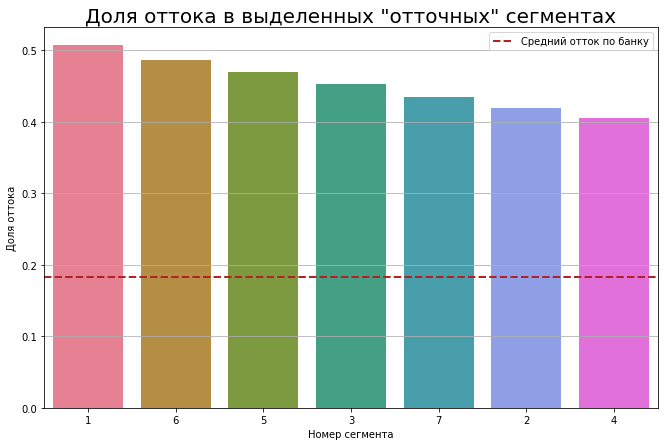

In [132]:
segments_churn = [s1_d, s2_d, s3_d, s4_d, s5_d, s6_d, s7_d]
seg_total = pd.DataFrame(segments_churn)
seg_total['group'] = (range(1, 8, 1))
seg_total.columns = ['dole', 'seg']
seg_total = seg_total.sort_values('dole', ascending=False)
ran = list(seg_total['seg'])

plt.figure(figsize=(11,7))
plt.title('Доля оттока в выделенных "отточных" сегментах', fontsize=20)
plt.axhline(ch, color=my_p[6], linestyle='dashed', linewidth='2', label='Средний отток по банку')
sns.barplot(data=seg_total, x='seg', y='dole', order=ran, palette='husl')
plt.xlabel('Номер сегмента')
plt.grid(axis='y')
plt.ylabel('Доля оттока');
plt.legend(loc=1);

Таким образом, на графике отображён приоритет отточных сегментов для работы с ними.

## Сегментация. Лояльность

Теперь выделяю несколько сегментов, где отток ниже, чем в среднем по банку, чтобы дать рекомендации по работе с "лояльными" клиентами.

### Сегмент "а"

Кредитный рейтинг - **до 825 баллов**\
Количество продуктов - **менее 2х**\
Количество баллов собственности - **менее 3х**

In [133]:
a = df.query('score < 825').query('products <2').query('equity <3')
a_d = make_seg(a)

Размер сегмента: 745 клиентов
Доля оттока: 0.06, или 6.0%.
Средний отток по банку: 0.18


### Сегмент "b"

Баланс - **менее 750 тысяч рублей**\
В последнее время **неактивны**\
Пол - **женский**

In [134]:
b = df.query('balance < 750000').query('last_activity == 0').query('gender == "Ж"')
b_d = make_seg(b)

Размер сегмента: 1255 клиентов
Доля оттока: 0.06, или 6.0%.
Средний отток по банку: 0.18


### Сегмент "с"

Город - **Рыбинск**\
Количество продуктов - **менее 2х**

In [135]:
с = df.query('city == "Рыбинск"').query('products < 2')
c_d = make_seg(с)

Размер сегмента: 850 клиентов
Доля оттока: 0.07, или 7.0%.
Средний отток по банку: 0.18


### Сегмент "d"

Возраст - **от 38 до 49 лет**\
Количество баллов собственности - **менее 2х**

In [136]:
d = df.query('38 <= age <= 49').query('equity < 3')
d_d = make_seg(d)

Размер сегмента: 1374 клиентов
Доля оттока: 0.07, или 7.0%.
Средний отток по банку: 0.18


### Сегмент "е"

Возраст - **60+ лет**\
Количество продуктов - **менее 2х**\
Количество баллов собственности - **менее 3х**

In [137]:
e = df.query('age >= 60').query('equity < 3').query('products < 2')
e_d = make_seg(e)

Размер сегмента: 272 клиентов
Доля оттока: 0.03, или 3.0%.
Средний отток по банку: 0.18


### Приоритизация лояльных сегментов

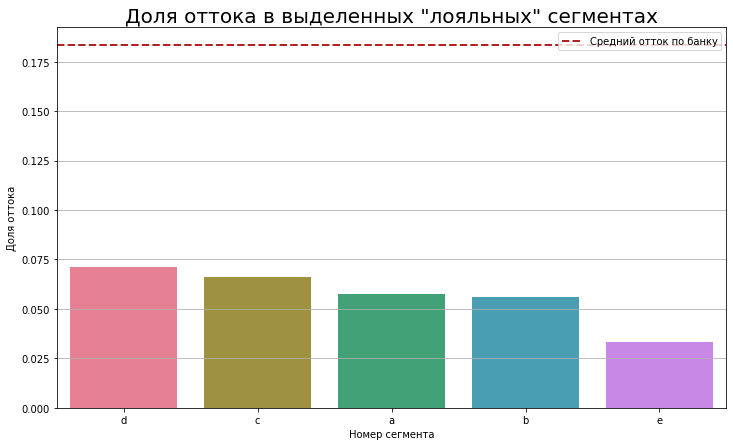

In [138]:
segm = [a_d, b_d, c_d, d_d, e_d]
seg_loyal = pd.DataFrame(segm)
seg_loyal['group'] = ['a', 'b', 'c', 'd', 'e']
seg_loyal.columns = ['dole', 'seg']
seg_loyal = seg_loyal.sort_values('dole', ascending=False)
ran = list(seg_loyal['seg'])

plt.figure(figsize=(12,7))
plt.title('Доля оттока в выделенных "лояльных" сегментах', fontsize=20)
plt.axhline(ch, color=my_p[6], linestyle='dashed', linewidth='2', label='Средний отток по банку')
sns.barplot(data=seg_loyal, x='seg', y='dole', order=ran, palette='husl')
plt.xlabel('Номер сегмента')
plt.grid(axis='y')
plt.ylabel('Доля оттока');
plt.legend(loc=1);

## Подведение итогов и рекомендации

Проведено исследование выборки в 10 000 клиентов банка в разрезе оттока.\
Данные были обработаны для последующего анализа, изучены дубликаты и пропуски. Данные неидеальны, и в выгрузке есть пропуски и дубликаты, предположительно, имеющие технический характер. Это будет отражено в рекомендациях для тех. отдела.

После этого проведён исследовательский анализ данных. Каждый признак из датасета был изучен на предмет выбросов, определены отточные и неотточные интервалы и категории. Посчитана корреляция всех признаков друг с другом. Данные очищены для формирования сегментов.

На основе результатов сформированы портреты типичного клиента в оттоке и вне оттока.

Далее был проведён статистический анализ, чтобы проверить статистическую значимость различий между оттоком и неоттоком в разрезе отдельных признаков, чтобы оценить значимость взаимосвязи факторов с оттоком и друг с другом.

На основе результатов исследовательного и статистического анализа были сформированы сегменты отточных и неотточных клиентов.\
Каждый сегмент содержит примерный портрет клиента, склонного к оттоку или неоттоку. В каждом отточном сегменте уровень оттока более чем 2 раза больше среднего по банку, а в каждом неотточном сегменте уровень оттока менее чем в 2 раза меньше среднего по банку.

### Сегменты с высоким оттоком

Ниже представлены 7 сегментов, расположенных в порядке приоритета (наиболее отточные сегменты - в приоритете). Приоритет также указан в скобках. К каждому сегменту указаны возможные причины оттока и рекомендации в зависимости от причин.

**Сегмент 1** (приоритет - **1**)\
**1497 клиентов**\
Кредитный рейтинг - **от 825 до 930 баллов**\
Количество продуктов банка - **2 и более**\
Количество баллов собственности - **более 2х**\
В последнее время проявляли **активность**


Клиенты с хорошим кредитным рейтингом, проявляющие активность и имеющие много продуктов должны быть лояльны и просто так из банка не уходят. Причём активнее с каждым новым продуктом.\
Тем не менее, каждый второй клиент в выборке ушёл в отток.\
Возможные причины:
* **Негативный пользовательский опыт**\
Возможно, количество продуктов влияет на интерфейс или техническую составляющую. Это можно проверить путём выгрузки логов о времени, проводимом такими клиентами в личном кабинете/приложении, для чего нужна работа технического отдела. Второй вариант - сбор обратной связи от клиентов об их опыте. Если теория подтвердится - нужна оптимизация интерфейса и устранение неполадок.
* **Резкая смена маркетинговой компании или тарифов, либо новости в инфополе**\
Другая возможная причина - лояльность активных клиентов банка упала в результате сильных перемен в условиях банка или в маркетинговой компании, либо из-за новостей. Если это имело место, то проверить взаимосвязь поможет проведение A/B - теста с выборкой клиентов до и после изменений. Путем решения может стать коррекция маркетинговой компании с поправкой на данный фактор, изменение подхода и целевой аудитории рекламы.
* **Привлечение клиентов другими банками на более выгодные условия**\
Учитывая, что данные клиенты активны и кредитоспособны - они ценны для других банков. Хороший кредитный рейтинг и достаточное количество собственности ведут к хорошим кредитным предложениям для клиентов - возможно, их активно хантят конкуренты. В этом случае могут помочь персональные предложения по кредитным продуктам и обслуживанию, лучше стандартных по банку, что даст клиентам ощущение их ценности для банка и лишит повода уходить к конкурентам.

**Сегмент 6** (приоритет - **2**)\
**473 клиента**\
Возраст - **от 50 до 60 лет**\
Количество баллов собственности - **более 2х**\
Количество продуктов банка - **более 1го**\
В последнее время проявляли **активность**

Клиенты старшей возрастной категории, которые были активны и имеют больше 2х баллов собственности. Данная возрастная категория, как правило, не слишком склонна к оттоку, при этом непросто принимает новое, и о привлечении клиента конкурентами говорить сложно.\
Возможные причины:
* **Негативный пользовательский опыт**\
Возможно, существенные изменения в интерфейсе не понравились клиентам старшей возрастной категории, что привело к их оттоку. Это можно проверить путём выгрузки логов о времени, проводимом такими клиентами в личном кабинете/приложении, для чего нужна работа технического отдела. Второй вариант - сбор обратной связи от клиентов об их опыте.
* **Резкая смена маркетинговой компании или тарифов, либо новости в инфополе**\
Другая возможная причина - лояльность активных клиентов банка упала в результате сильных перемен в условиях банка или в маркетинговой компании, либо из-за новостей. Если это имело место, то проверить взаимосвязь поможет проведение A/B - теста с выборкой клиентов до и после изменений. Путем решения может стать коррекция маркетинговой компании с поправкой на данный фактор, изменение подхода и целевой аудитории рекламы.

**Сегмент 5** (приоритет - **3**)\
**1076 клиентов**\
Кредитный рейтинг - **от 825 до 930**\
Кредитная карта - **отсутствует**\
В последнее время проявляли **активность**

Клиенты с хорошим кредитным рейтингом без кредитки и проявляющие активность. В целом рекомендации аналогичны сегменту 3.

* **Негативный пользовательский опыт**\
Возможно, количество продуктов влияет на интерфейс или техническую составляющую. Это можно проверить путём выгрузки логов о времени, проводимом такими клиентами в личном кабинете/приложении, для чего нужна работа технического отдела. Второй вариант - сбор обратной связи от клиентов об их опыте.
* **изменений маркетинга или тарифов**\
Другая возможная причина - лояльность активных клиентов банка упала в результате сильных перемен в условиях банка или в маркетинговой компании, либо из-за новостей. Если это имело место, то проверить взаимосвязь поможет проведение A/B - теста с выборкой клиентов до и после изменений. Путем решения может стать коррекция маркетинговой компании с поправкой на данный фактор, изменение подхода и целевой аудитории рекламы.
* **Привлечение клиентов другими банками на более выгодные условия**\
Учитывая, что данные клиенты активны и кредитоспособны - они ценны для других банков. Хороший кредитный рейтинг и достаточное количество собственности ведут к хорошим кредитным предложениям для клиентов - возможно, их активно хантят конкуренты. В этом случае могут помочь персональные предложения по кредитным продуктам и обслуживанию, лучше стандартных по банку, что даст клиентам ощущение их ценности для банка и лишит повода уходить к конкурентам.


**Сегмент 3** (приоритет - **4**)\
**1199 клиентов**\
Кредитная карта - **отсутствует**\
Количество продуктов банка - **более 1го**\
В последнее время проявляли **активность**

Клиенты, не имеющие кредитки, но имеющие более одного продукта и проявляющие активность. Отсутствие кредитки ведёт к ещё более низкому удержанию, чем могло быть.\
Возможные причины:
* **Негативный пользовательский опыт**\
Возможно, количество продуктов влияет на интерфейс или техническую составляющую. Это можно проверить путём выгрузки логов о времени, проводимом такими клиентами в личном кабинете/приложении, для чего нужна работа технического отдела. Второй вариант - сбор обратной связи от клиентов об их опыте.
* **изменений маркетинга или тарифов**\
Другая возможная причина - лояльность активных клиентов банка упала в результате сильных перемен в условиях банка или в маркетинговой компании, либо из-за новостей. Если это имело место, то проверить взаимосвязь поможет проведение A/B - теста с выборкой клиентов до и после изменений. Путем решения может стать коррекция маркетинговой компании с поправкой на данный фактор, изменение подхода и целевой аудитории рекламы.

**Сегмент 7** (приоритет - **5**)\
**1617 клиентов**\
Пол - **мужской**\
Количество баллов собственности - **более 2х**\
Кредитный рейтинг - **от 825 до 930**

Мужчины, которые имеют более 2х баллов собственности и хороший кредитный рейтинг. Данная категория ценна для любого банка, и здесь отток может быть вызван кредитными предложениями конкурентов. Рекомендации в целом схожи с сегментами 1 и 5.

* **Неудачная рекламная компания**\
Мужчины подвержены оттоку куда сильнее женщин, хотя количество М и Ж в выборке одинаково. Это может быть результатом рекламной компании, которая располагает к банку лишь женскую аудиторию. Может помочь коррекция рекламной компании
* **Привлечение клиентов другими банками на более выгодные условия**\
Учитывая, что данные клиенты кредитоспособны - они ценны для других банков. Хороший кредитный рейтинг и достаточное количество собственности ведут к хорошим кредитным предложениям для клиентов - возможно, их активно хантят конкуренты. В этом случае могут помочь персональные предложения по кредитным продуктам и обслуживанию, лучше стандартных по банку, что даст клиентам ощущение их ценности для банка и лишит повода уходить к конкурентам.

**Сегмент 2** (приоритет - **6**)\
**1096 клиентов**\
Баланс - **от 750 т.рублей до 2 млн рублей**\
Пол - **Мужской**

Мужчины с немалым балансом счёта уходят в отток куда чаще среднего по банку.\
Возможные причины:
* **Тарифные условия**\
Клиенты, хранящие остатки на счёте, могут иметь желание разместить их на депозите или схожих продуктах, однако условия могут их не устраивать, что приводит к оттоку в банки с более выгодными условиями. Решением могут стать персональные предложения по депозитам и схожим продуктам. Также, возможно, со ставками на депозиты всё в порядке, но клиенту недостаточно "плюшек" от банка, их также можно добавить для этого сегмента.
* **Неудачная рекламная компания**\
Мужчины подвержены оттоку куда сильнее женщин, хотя количество М и Ж в выборке одинаково. Это может быть результатом рекламной компании, которая располагает к банку лишь женскую аудиторию. Может помочь коррекция рекламной компании
* **Привлечение клиентов другими банками на более выгодные условия**\
Учитывая, что данные клиенты активны и кредитоспособны - они ценны для других банков. Хороший кредитный рейтинг и достаточное количество собственности ведут к хорошим кредитным предложениям для клиентов - возможно, их активно хантят конкуренты. В этом случае могут помочь персональные предложения по кредитным продуктам и обслуживанию, лучше стандартных по банку, что даст клиентам ощущение их ценности для банка и лишит повода уходить к конкурентам.

**Сегмент 4** (приоритет - **7**)\
**409 клиентов**\
город - **Ярославль**\
Возраст - **25-35 лет**\
Кредитная карта - **отсутствует**

Молодые клиенты, не обременённые наличием кредитки и проживающие в Ярославле.\
Возможные причины:
* **Неподходящая рекламная компания**\
Возможно, реклама в среднем ориентирована на более взрослую аудиторию, но более молодую при этом не привлекает, или же вовсе отталкивает. Поможет отдельная компания для этого сегмента по возрасту и городу - партнерские ивенты в Ярославле (например, спортивные или связанные с современными профессиями), повышенный кешбек на заведения и концерты, особые условия по кредитке (она способствует удержанию).


### "Лояльные" сегменты с низким оттоком

Также выделено 5 сегментов, в которых отток значительно ниже, чем по банку. Они указаны ниже - при работе рекомендовано уделять особое внимание данным сегментам, поскольку они склонны оставаться в банке.

**Сегмент "а"**\
**745 клиентов**\
Кредитный рейтинг - **до 825 баллов**\
Количество продуктов - **менее 2х**
Количество баллов собственности - **менее 3х**

Уровень оттока - в 3 раза меньше среднего по банку

**Сегмент "b"**\
**1255 клиентов**\
Баланс - **менее 750 тысяч рублей**\
В последнее время **неактивны**\
Пол - **женский**

Отток в 3 раза меньше среднего по банку

**Сегмент "с"**\
**850 клиентов**\
Город - **Рыбинск**\
Количество продуктов - **менее 2х**

Отток в 2.5 раза меньше среднего по банку.

**Сегмент "d"**\
**1374 клиента**\
Возраст - **от 38 для 49 лет**\
Количество баллов собственности - **менее 2х**

Отток в 2.5 раза меньше среднего по банку.

**Сегмент "e"**\
**272 клиента**\
Возраст - **60+ лет**\
Количество продуктов - **менее 2х**\
Количество баллов собственности - **менее 3х**

Отток в 6 раз меньше среднего по банку.

Рекомендации по данным сегментам единые - дополнительный мониторинг активности клиентов (среди лояльных много неактивных клиентов, но в перспективе они приносят банку меньший доход, нежели активные) удовлетворенности качеством обслуживания, продажа кредитных карт (если ещё нет) и персональные предложения в рамках лояльности к клиентам, проявляющим лояльность со своей стороны.

### Рекомендации для технического отдела

В ходе предобработки данных были выявлены дубликаты идентификаторов пользователей. Поскольку все пользователи должны быть уникальными - могут быть проблемы в работе системы.

In [139]:
dubls

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.00000,Рыбинск,Ж,55.00000,1,362756.49000,3,0,1,175920.48000,1
7694,116540,887.00000,Ярославль,Ж,38.00000,0,NaN,1,0,1,119247.61000,0
7542,117943,880.00000,Ярославль,Ж,40.00000,0,NaN,1,1,0,137718.93000,0
4866,117943,855.00000,Рыбинск,Ж,32.00000,6,1036832.93000,4,1,1,107792.71000,1
5896,120258,905.00000,Ярославль,М,30.00000,0,NaN,1,1,1,146427.96000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.00000,Ярославль,М,37.00000,4,14648692.14000,2,0,0,934412.61000,1
8205,227795,840.00000,Рыбинск,М,34.00000,2,350768.03000,1,1,0,102036.14000,1
8497,227795,839.00000,Ярославль,М,34.00000,2,326593.14000,2,1,0,103314.92000,0
6457,228075,839.00000,Рыбинск,М,39.00000,5,507199.85000,3,0,1,85195.80000,0


Все выглядит так, словно дубликаты идентификаторов принадлежат разным людям, которые обращались в филиалы в Яроставле и Рыбинске - но по, вероятно, системной ошибке, они получили одинаковый идентификатор пользователя.\
За исключением идентификатора остальные данные разнятся - кредитный рейтинг, баллы собственности, возраст, пол, доход и остальные признаки. При этом в 2/3 случаев в одной из двух дублирующихся записей есть признак оттока, также у данных пользователей часто встречаются пропуски в балансе.

Рекомендую проверить данные идентификаторы, чтобы исключить вероятность системной ошибки.

In [140]:
dubls['userid'].unique()

array([116540, 117943, 120258, 123461, 124450, 126368, 127440, 129785,
       131419, 140377, 140934, 141265, 141945, 143592, 148826, 149365,
       150667, 151662, 152479, 155765, 155872, 160075, 162053, 163207,
       163657, 164676, 168998, 170312, 171751, 172142, 175730, 181526,
       183510, 185748, 185829, 187459, 187635, 188957, 190253, 191520,
       195884, 197364, 198635, 199312, 200863, 202983, 206759, 208081,
       208738, 208815, 210135, 210627, 210662, 210792, 210898, 211130,
       214031, 216848, 217412, 217619, 217643, 217826, 218868, 219343,
       220816, 221156, 221197, 221809, 222480, 226550, 226719, 227795,
       228075])